<a href="https://colab.research.google.com/github/Shruthi-Arun/Macroeconomic-Indicators-for-Stock-Dynamics/blob/main/Notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('macro_data_cleaned.csv')
print(df.columns)

df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

df.info()


Index(['Date', 'Inflation', 'Unemployment', 'Interest_Rate', 'GDP',
       'Industrial_Output', 'Money_Supply', 'Consumer_Confidence',
       'Treasury_Yield', 'SP500_Returns'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 801 entries, 1959-01-31 to 2025-09-30
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Inflation            801 non-null    float64
 1   Unemployment         801 non-null    float64
 2   Interest_Rate        801 non-null    float64
 3   GDP                  801 non-null    float64
 4   Industrial_Output    801 non-null    float64
 5   Money_Supply         801 non-null    float64
 6   Consumer_Confidence  801 non-null    float64
 7   Treasury_Yield       801 non-null    float64
 8   SP500_Returns        801 non-null    float64
dtypes: float64(9)
memory usage: 62.6 KB


In [ ]:
df.head()

Inflation  Unemployment  Interest_Rate       GDP  \
Date                                                           
1959-01-31      29.01           6.0           2.48  3352.129   
1959-02-28      29.00           5.9           2.43  3352.129   
1959-03-31      28.97           5.6           2.80  3352.129   
1959-04-30      28.98           5.2           2.96  3427.667   
1959-05-31      29.04           5.1           2.90  3427.667   

            Industrial_Output  Money_Supply  Consumer_Confidence  \
Date                                                               
1959-01-31            21.9616         286.6                 90.8   
1959-02-28            22.3917         287.7                 90.8   
1959-03-31            22.7142         289.2                 90.8   
1959-04-30            23.1981         290.1                 90.8   
1959-05-31            23.5476         292.2                 95.3   

            Treasury_Yield  SP500_Returns  
Date                                       
1959-01-31            4.02       0.434707  
1959-02-28            3.96      -0.072139  
1959-03-31            3.99       0.054140  
1959-04-30            4.12       3.878069  
1959-05-31            4.31       1.892690

In [ ]:
df.describe()


Inflation  Unemployment  Interest_Rate           GDP  \
count  801.000000    801.000000     801.000000    801.000000   
mean   140.944479      5.862047       4.771573  11632.552109   
std     85.391022      1.685440       3.600813   5922.623685   
min     28.970000      3.400000       0.050000   3352.129000   
25%     54.600000      4.600000       2.000000   6150.131000   
50%    139.700000      5.600000       4.650000  10347.429000   
75%    214.790000      6.900000       6.470000  16743.162000   
max    324.368000     14.800000      19.100000  23770.976000   

       Industrial_Output  Money_Supply  Consumer_Confidence  Treasury_Yield  \
count         801.000000    801.000000           801.000000      801.000000   
mean           68.088921   5615.058427            85.511111        5.752859   
std            26.970055   5991.892538            12.925321        2.900398   
min            21.961600    286.600000            50.000000        0.620000   
25%            45.085000    991.500000            76.000000        3.880000   
50%            63.126800   3398.800000            89.500000        5.180000   
75%            96.180900   8289.000000            95.100000        7.460000   
max           104.211500  22212.500000           112.000000       15.320000   

       SP500_Returns  
count     801.000000  
mean        0.692191  
std         4.261525  
min       -21.763041  
25%        -1.754387  
50%         0.997998  
75%         3.463658  
max        16.304691

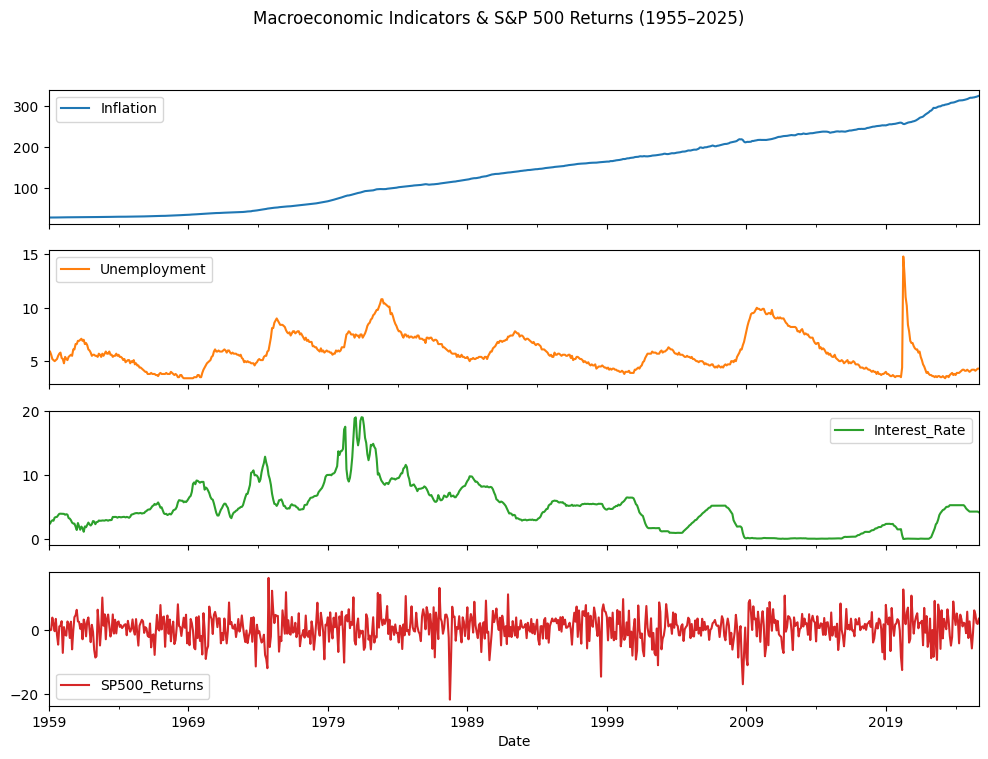

In [ ]:
# time series
df[['Inflation', 'Unemployment', 'Interest_Rate', 'SP500_Returns']].plot(subplots=True, figsize=(12,8))
plt.suptitle('Macroeconomic Indicators & S&P 500 Returns (1955–2025)')
plt.show()

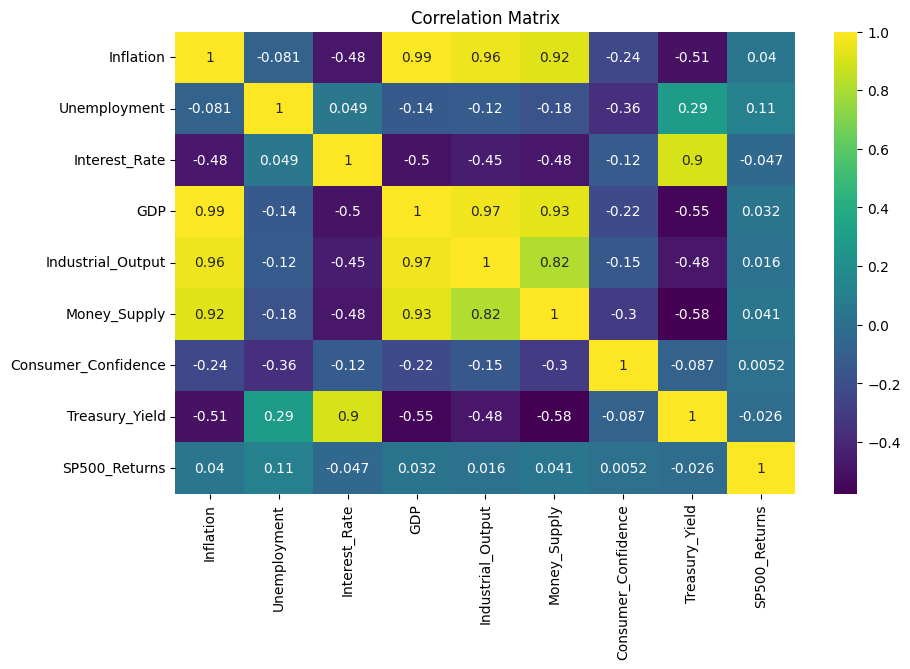

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

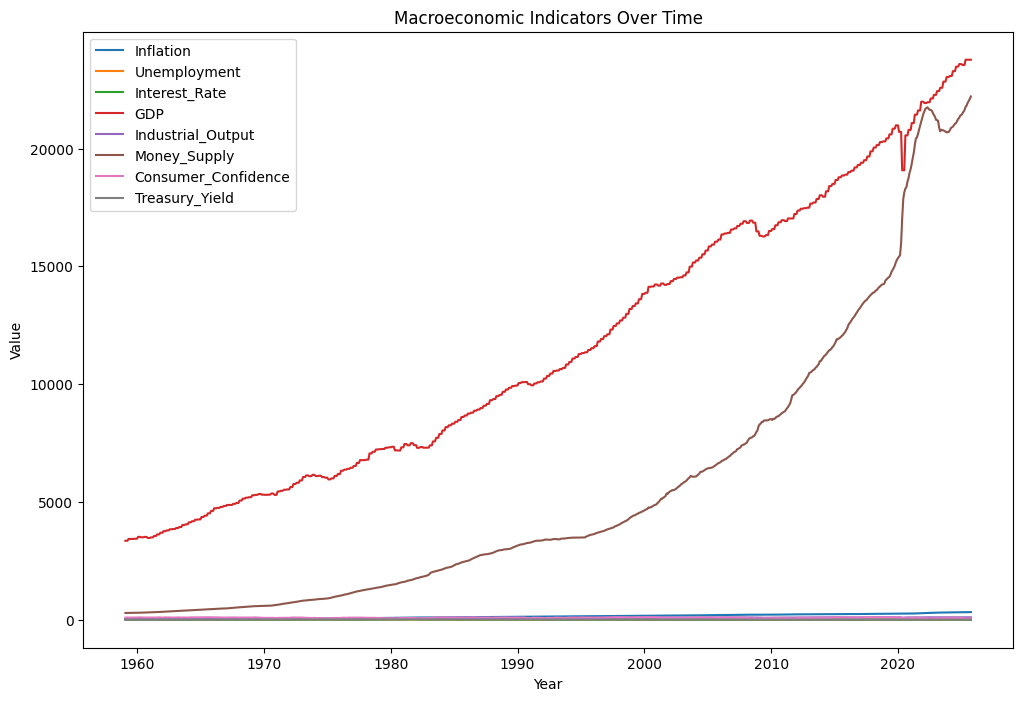

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Plot overall trends for all indicators
plt.figure(figsize=(12, 8))
for col in df.columns[:-1]:  # excluding SP500_Returns
    plt.plot(df.index, df[col], label=col)
plt.title("Macroeconomic Indicators Over Time")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.show()



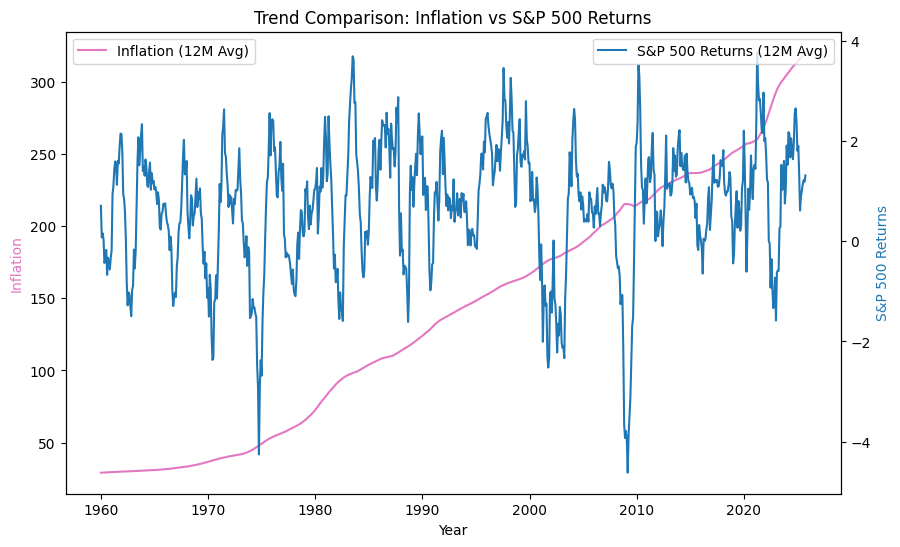

In [ ]:

# Compare Inflation vs. S&P 500 Returns (trend comparison)

rolling_df = df.rolling(window=12).mean()
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(rolling_df.index, rolling_df["Inflation"], color='tab:pink', label='Inflation (12M Avg)')
ax2 = ax1.twinx()
ax2.plot(rolling_df.index, rolling_df["SP500_Returns"], color='tab:blue', label='S&P 500 Returns (12M Avg)')

ax1.set_xlabel("Year")
ax1.set_ylabel("Inflation", color='tab:pink')
ax2.set_ylabel("S&P 500 Returns", color='tab:blue')
plt.title("Trend Comparison: Inflation vs S&P 500 Returns")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

# 1. Time Series Visualization

In [ ]:
variables = ['Inflation', 'Unemployment', 'Interest_Rate', 'GDP',
             'Industrial_Output', 'Money_Supply', 'Consumer_Confidence',
             'Treasury_Yield', 'SP500_Returns']

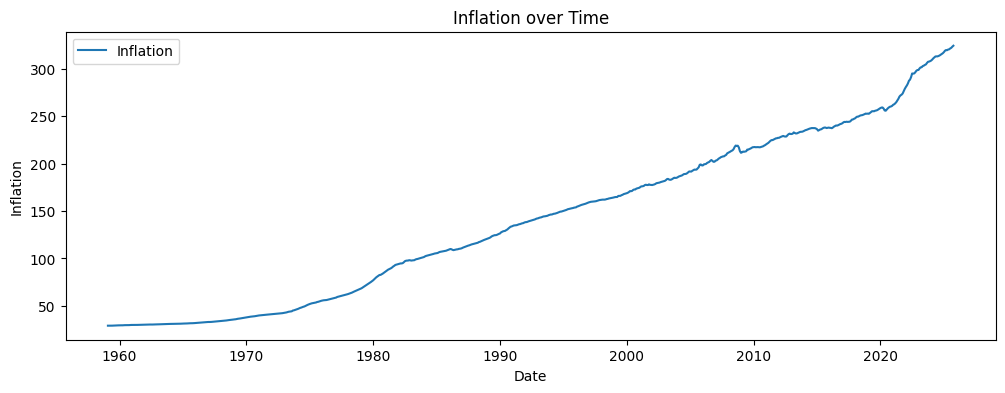

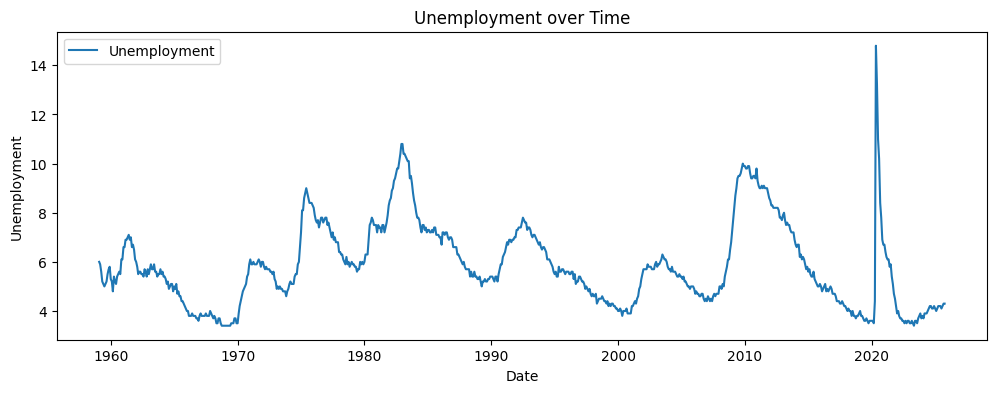

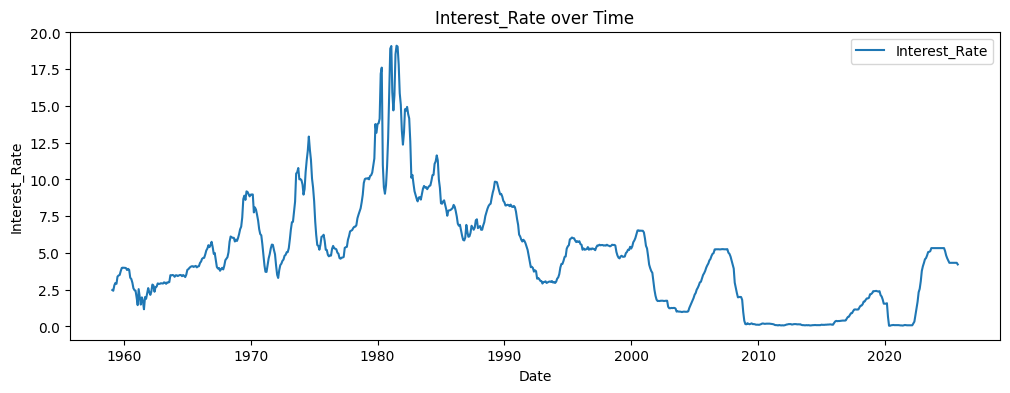

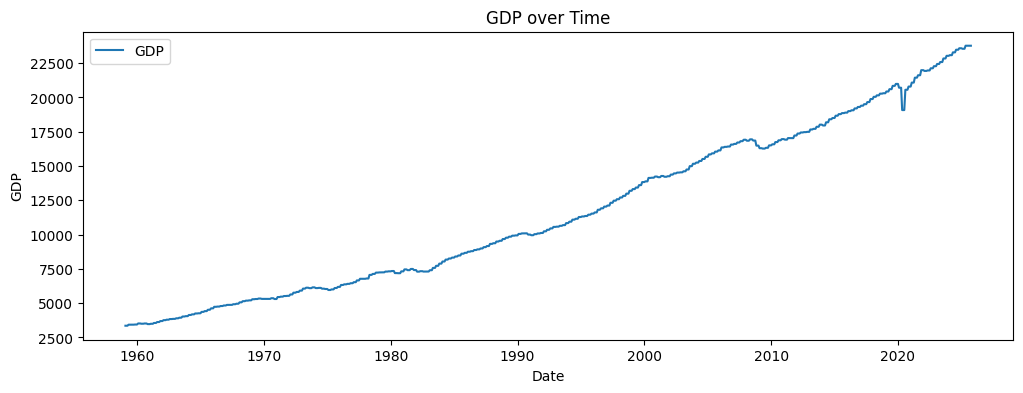

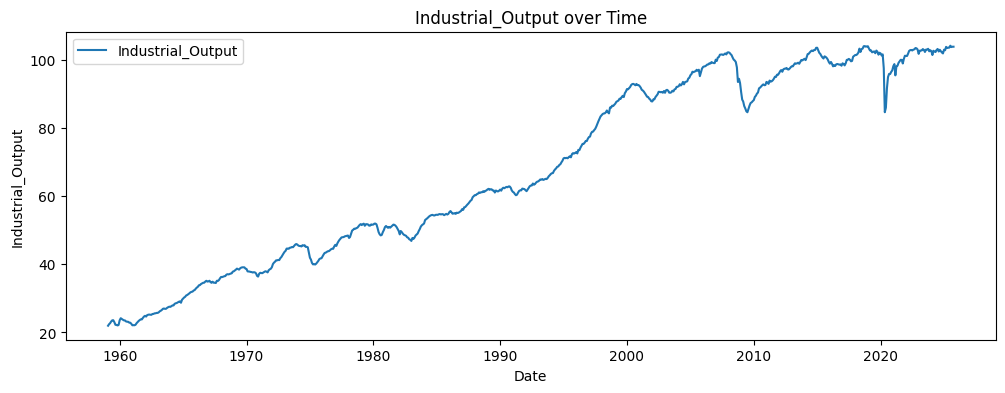

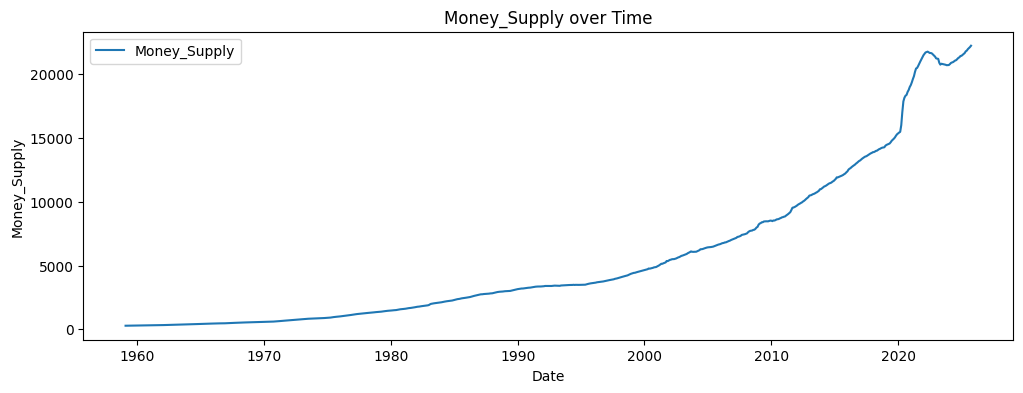

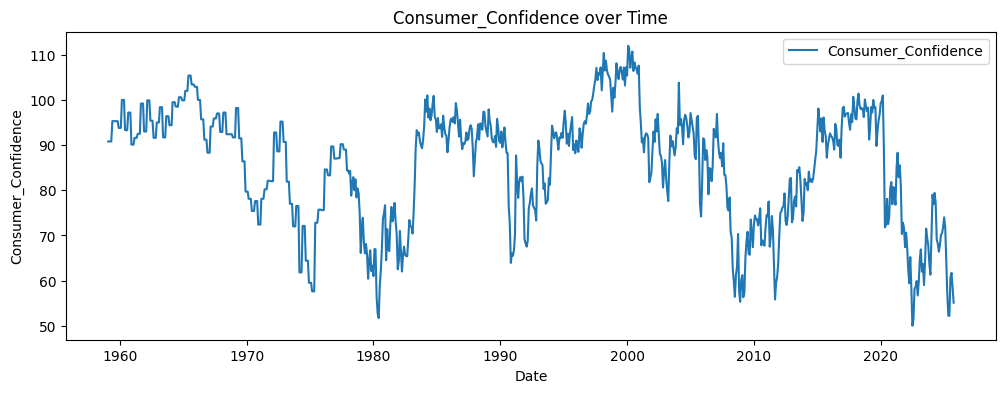

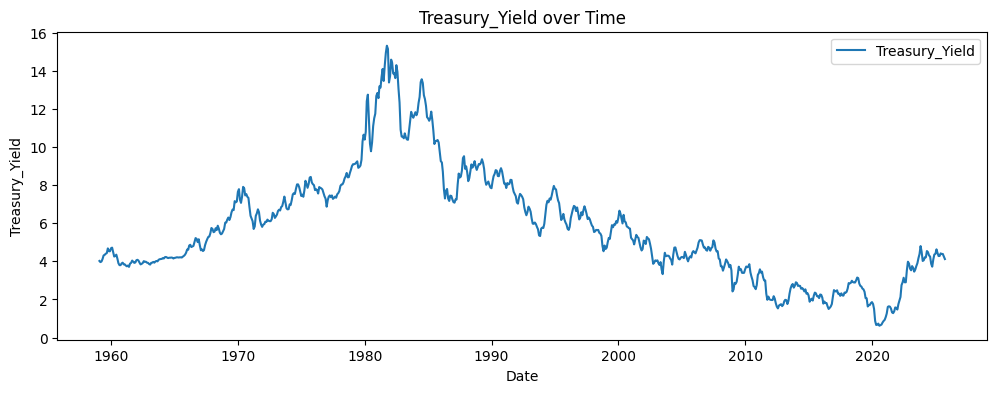

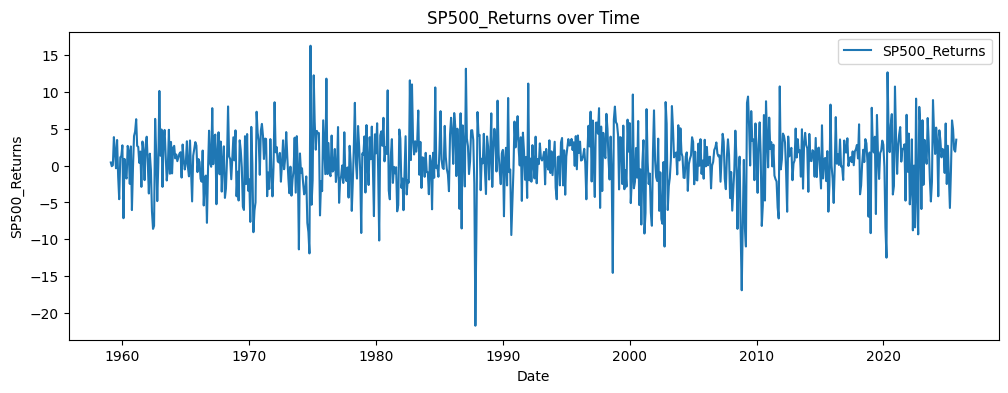

In [ ]:
# Line plots for each variable
for col in variables:
    plt.figure(figsize=(12,4))
    plt.plot(df.index, df[col], label=col)
    plt.title(f"{col} over Time")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.legend()
    plt.show()

Inflation: This price index exhibits a strong, persistent long-term upward trend, accelerating significantly in recent decades, confirming its non-stationary nature.

GDP: Shows a long-term, accelerating growth trend consistent with overall U.S. economic expansion, with a noticeable, sharp short-term dip around the 2020 pandemic.

Money_Supply: Displays the steepest, near-exponential long-term growth across the sample, highlighting periods of substantial monetary expansion post-2008 and post-2020.

Industrial_Output: Follows a strong long-term upward trend, reflecting increasing production capacity, but is clearly affected by cyclical dips during recessions.

Unemployment: Is highly cyclical, characterized by sharp, predictable spikes during recessions (the largest being the 2020 peak) followed by prolonged declines during expansionary periods.

Interest_Rate: Follows a secular U-shaped trend, peaking in the early 1980s before declining toward zero, and then rising sharply in the post-2022 period.

Treasury_Yield: Mirrors the cyclical and secularly declining pattern of interest rates, peaking in the early 1980s and reaching historical lows post-2008.

Consumer_Confidence: This index is mean-reverting and highly volatile, fluctuating within a relatively fixed range across the decades, with sharp drops corresponding to periods of economic distress.

SP500_Returns: Is a highly volatile, visually stationary series centered near zero, showing no long-term trend in its average level but exhibiting periods of volatility clustering.




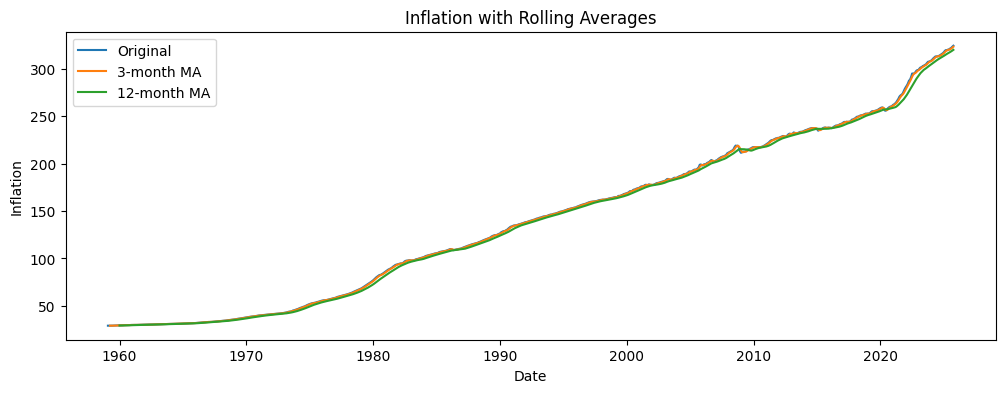

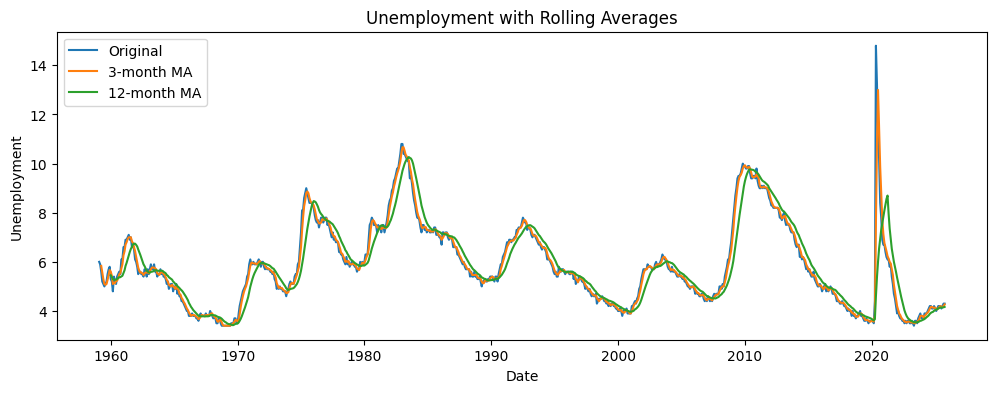

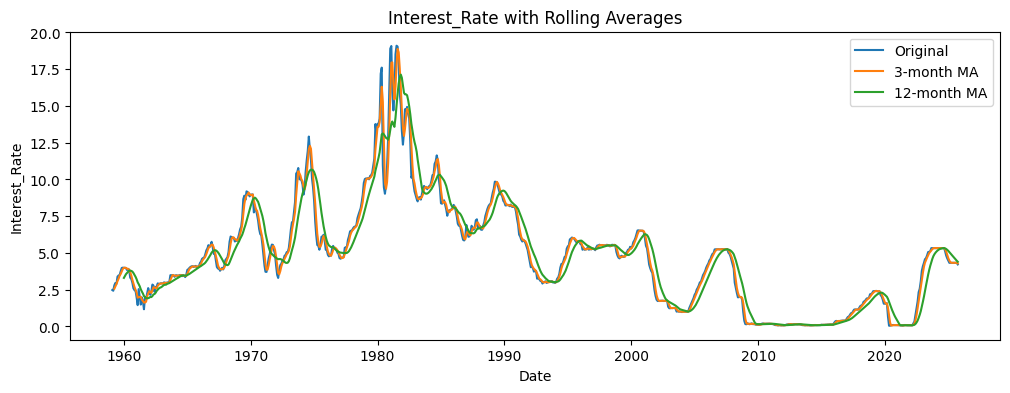

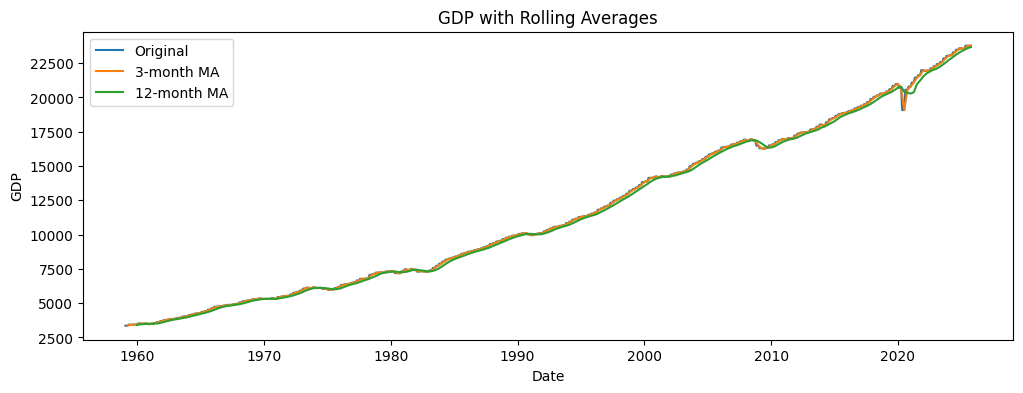

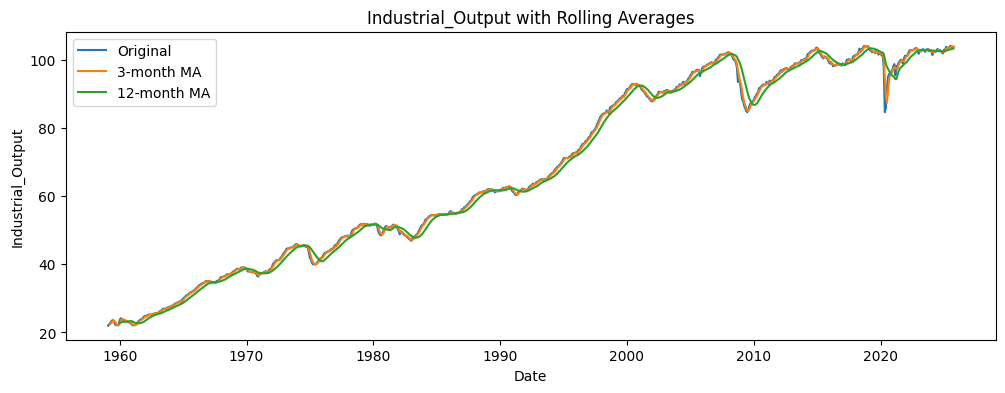

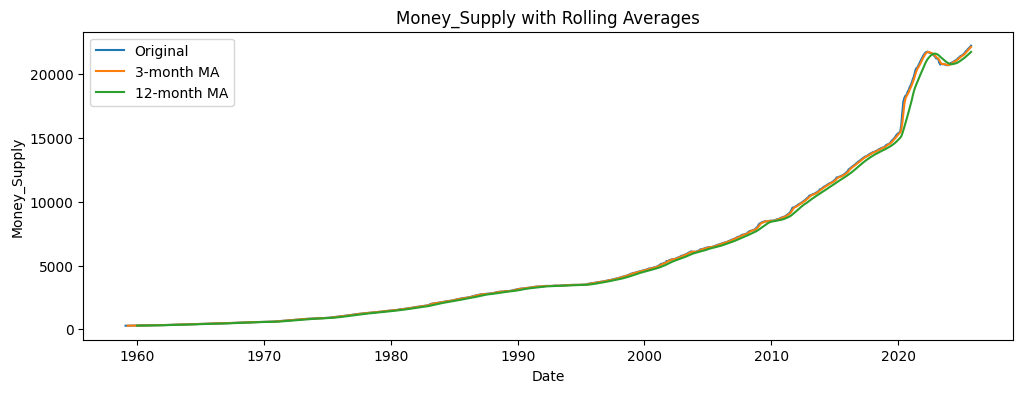

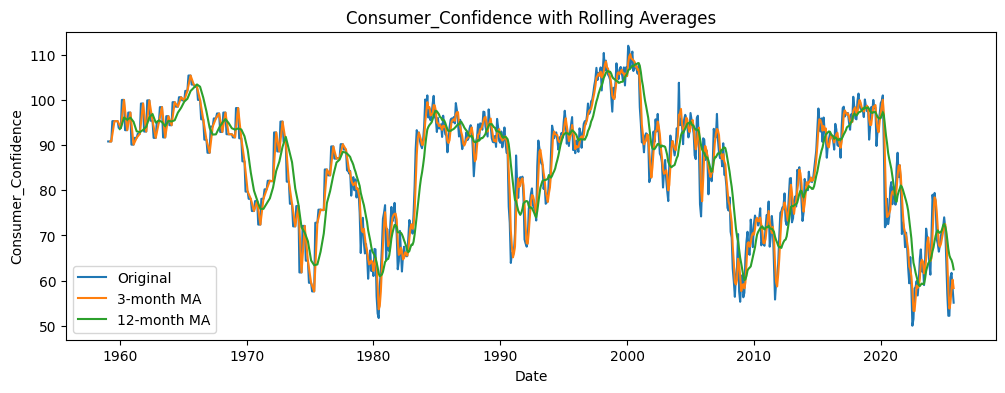

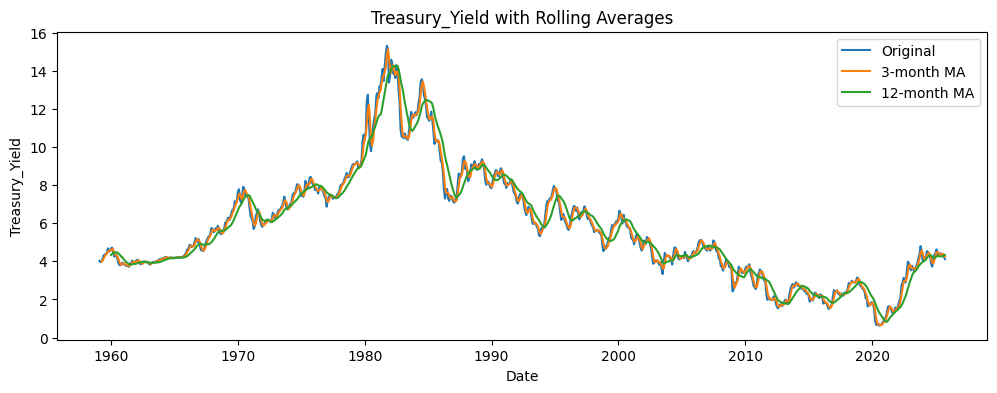

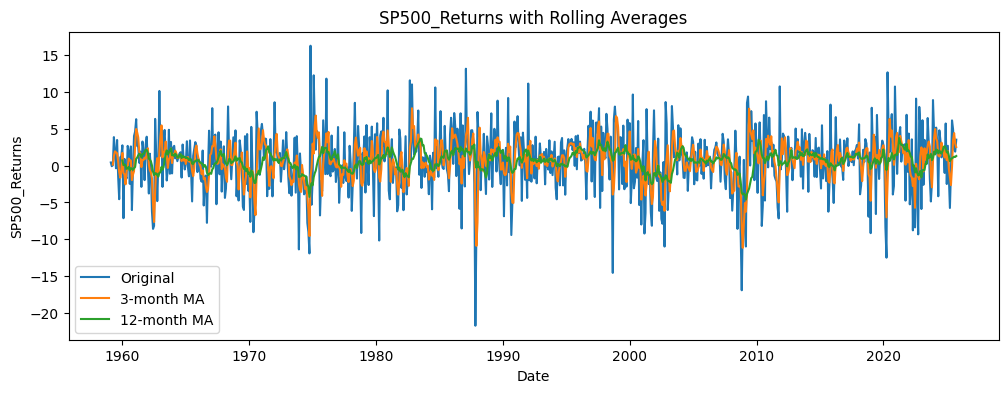

In [ ]:
# Rolling averages: 3-month and 12-month
for col in variables:
    plt.figure(figsize=(12,4))
    plt.plot(df.index, df[col], label='Original')
    plt.plot(df.index, df[col].rolling(window=3).mean(), label='3-month MA')
    plt.plot(df.index, df[col].rolling(window=12).mean(), label='12-month MA')
    plt.title(f"{col} with Rolling Averages")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.legend()
    plt.show()

The rolling average plots confirm the data's stationarity characteristics crucial for your VAR model:

GDP, Inflation, Money_Supply, Industrial_Output: The near-perfect alignment of the 12-month moving average with the original data confirms the strong, deterministic trend and necessity of log-differencing to achieve stationarity (growth rates).

Interest_Rate and Treasury_Yield: The MAs smooth out short-term noise but clearly track the secular peak in the 1980s followed by a long-term decline, confirming the need for a first difference to model the change in rates.

SP500_Returns: The 12-month moving average consistently hovers near zero, strongly supporting the deduction that the series is stationary (I(0)) and ready for modeling without further differencing.

Unemployment and Consumer_Confidence: The MAs effectively reveal the clear cyclical patterns without a strong long-term trend, suggesting they are likely I(0) or I(1) but visually confirm the mean is not constantly changing.

# 2. Distribution Analysis

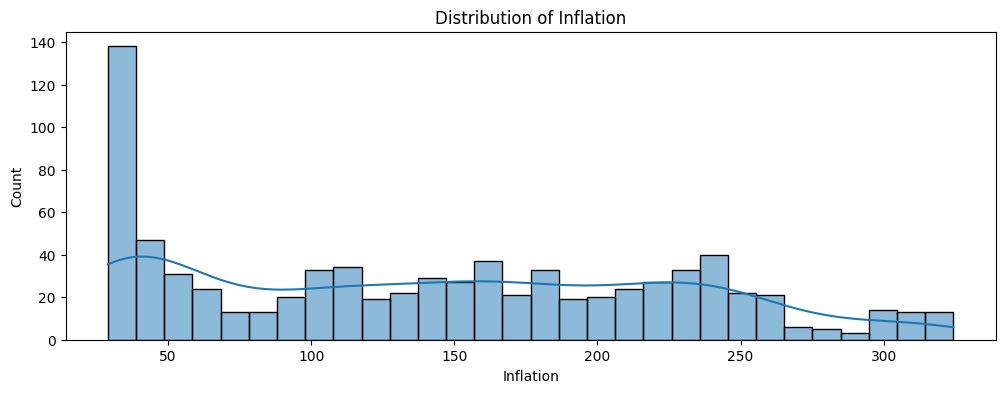

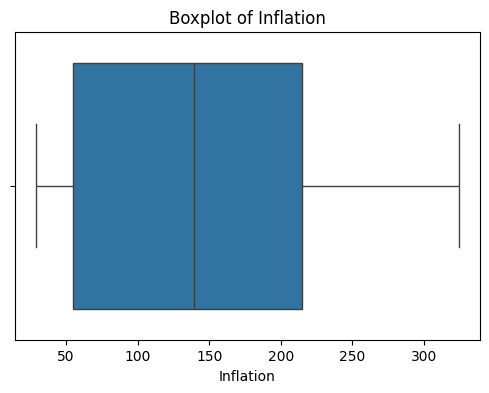

Inflation Skewness: 0.25, Kurtosis: -1.10



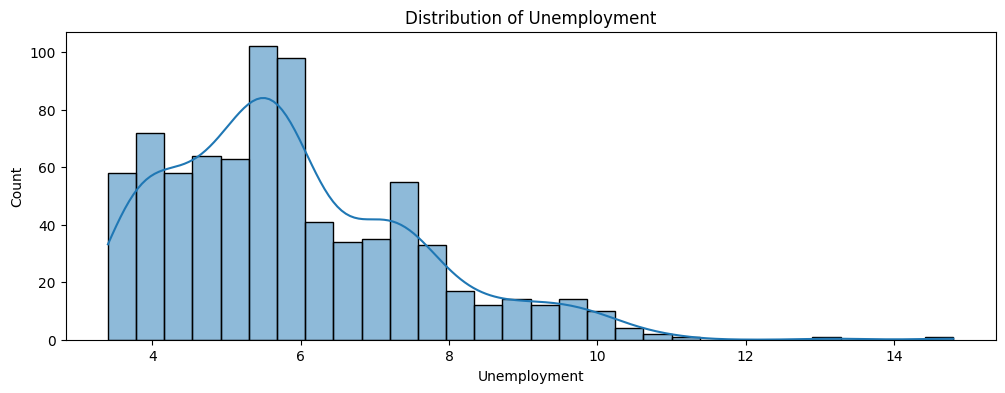

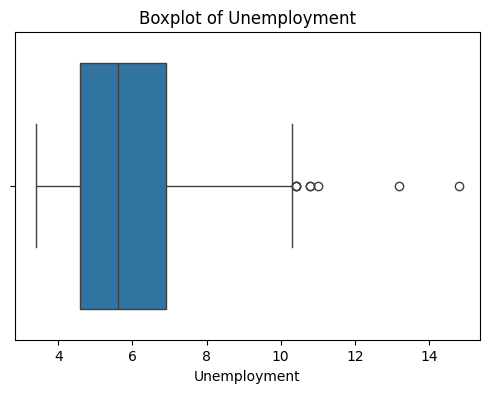

Unemployment Skewness: 0.93, Kurtosis: 1.15



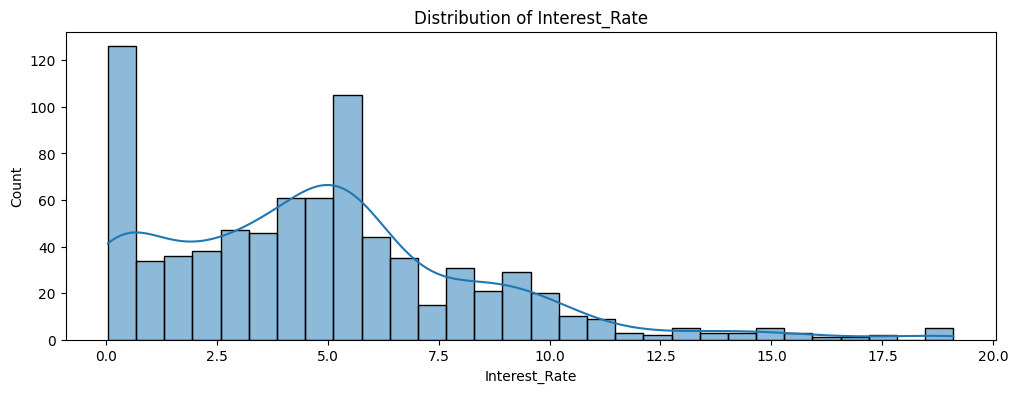

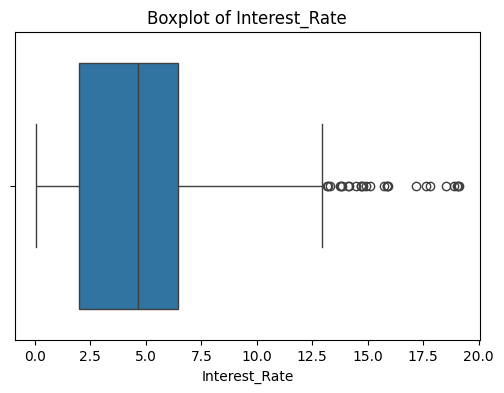

Interest_Rate Skewness: 0.99, Kurtosis: 1.52



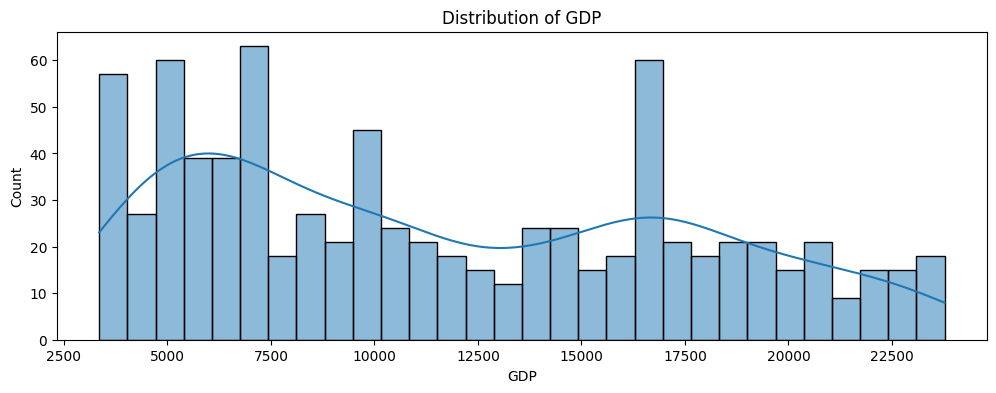

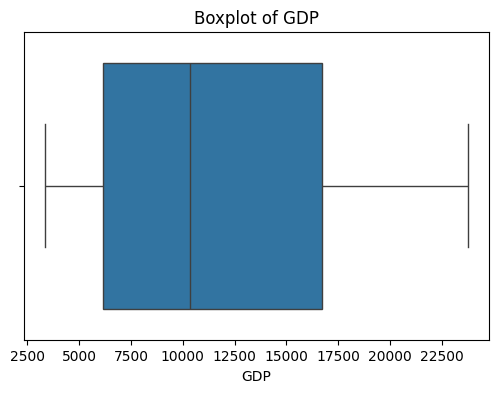

GDP Skewness: 0.36, Kurtosis: -1.13



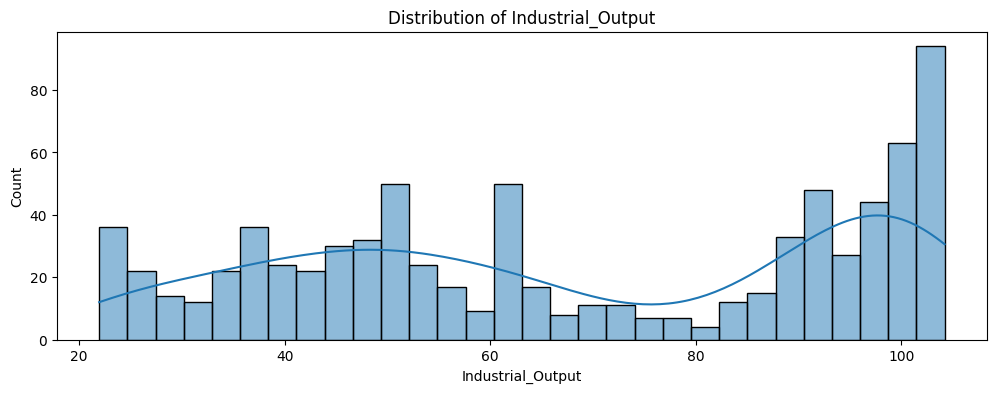

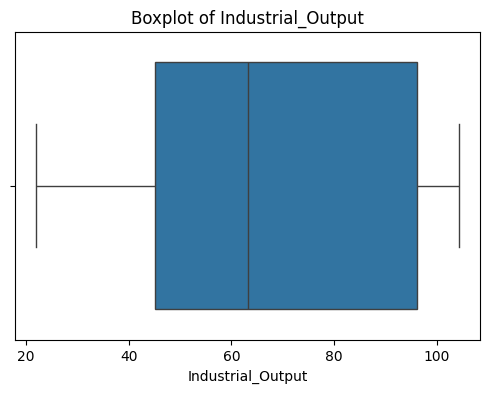

Industrial_Output Skewness: -0.09, Kurtosis: -1.47



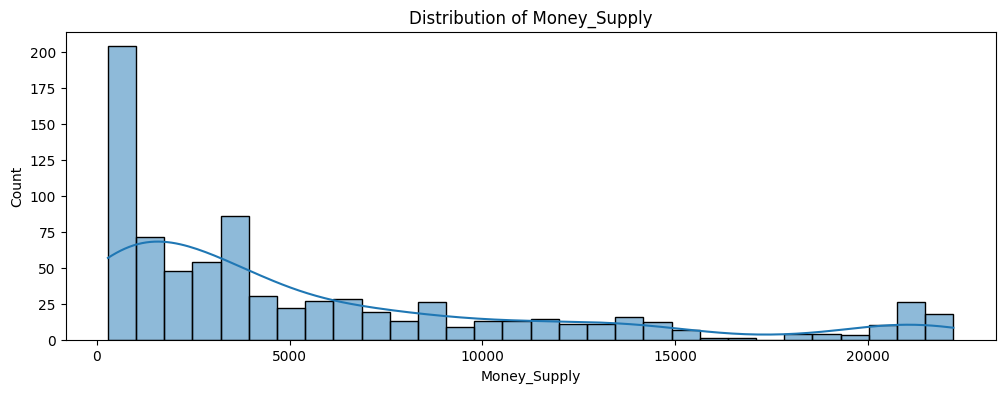

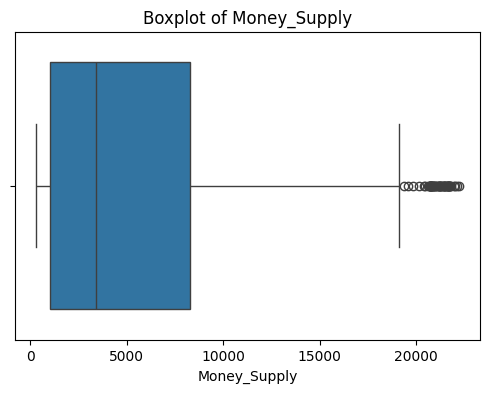

Money_Supply Skewness: 1.38, Kurtosis: 0.96



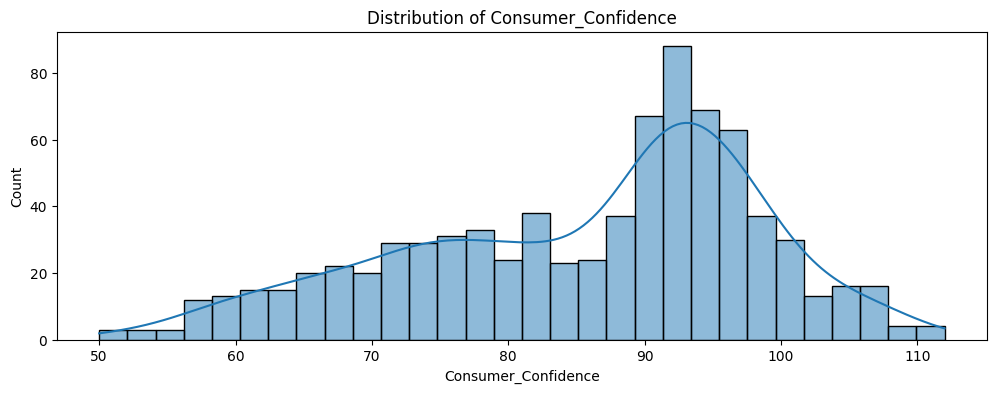

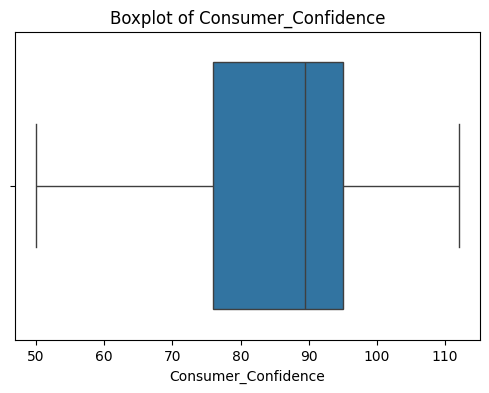

Consumer_Confidence Skewness: -0.53, Kurtosis: -0.52



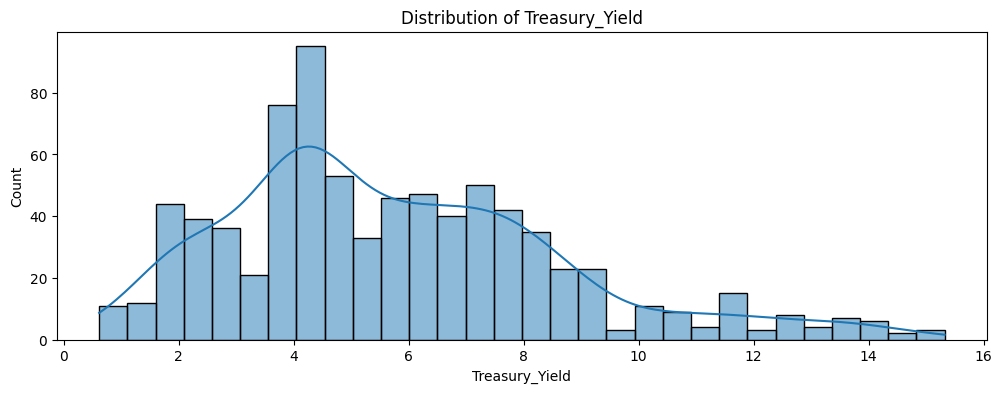

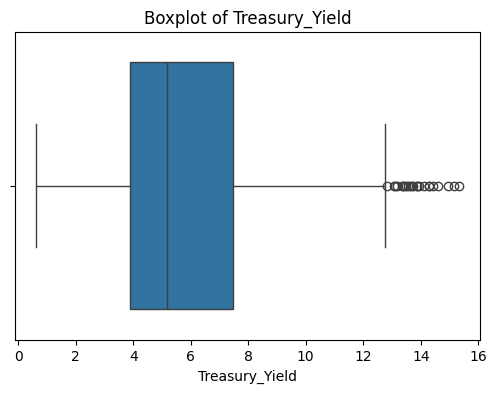

Treasury_Yield Skewness: 0.80, Kurtosis: 0.48



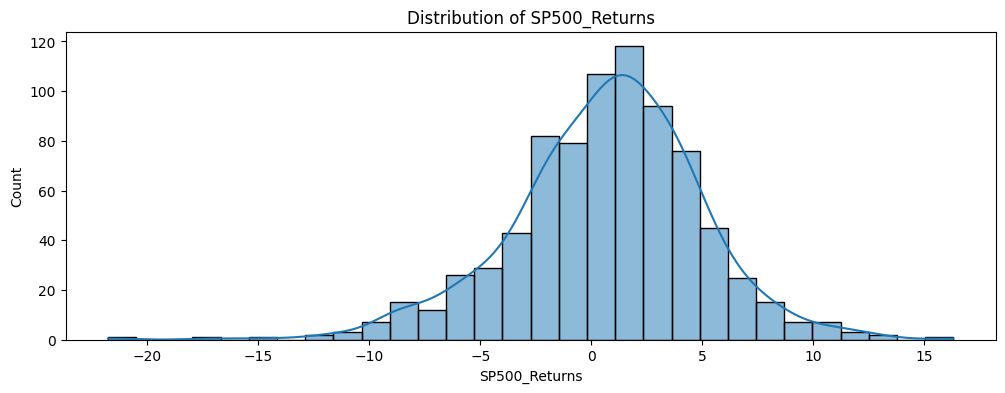

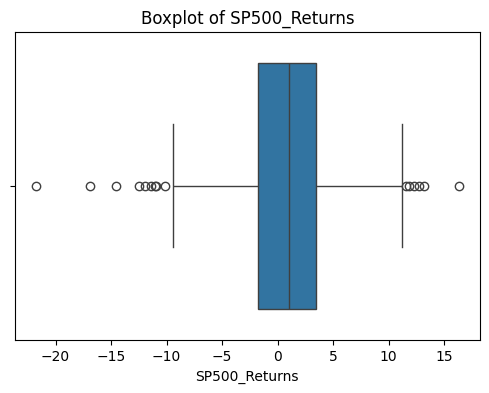

SP500_Returns Skewness: -0.43, Kurtosis: 1.63



In [ ]:
for col in variables:
    plt.figure(figsize=(12,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

    print(f"{col} Skewness: {df[col].skew():.2f}, Kurtosis: {df[col].kurt():.2f}\n")


These distribution plots and statistics reveal the specific distributional shape and outlier presence of your variables, crucial for understanding and addressing the non-normality assumptions of your VAR model.

Inflation: The distribution is relatively uniform/platykurtic (Kurtosis: -1.10) across its range, with the boxplot confirming the data's wide spread and no extreme outliers.

GDP: Similar to Inflation, the distribution is broad and platykurtic (Kurtosis: -1.13), with the boxplot showing the massive range of values due to the strong trend, but no outliers outside the main range.

Industrial_Output: Exhibits a highly platykurtic and near-symmetric distribution (Skewness: -0.09, Kurtosis: -1.47), suggesting nearly equal probability across all historical output levels, likely due to the strong trend.

Unemployment: Displays a strong positive skew (Skewness: 0.93), characterized by a concentration of values at low rates and a right tail indicating rare, extreme high-unemployment events (outliers visible on the boxplot).

Interest_Rate: Exhibits a significant positive skew (Skewness: 0.99), characterized by a high frequency of low rates (near zero) and a long right tail of historically high rates (outliers visible on the boxplot).  

Money_Supply: Exhibits a strong positive skew (Skewness: 1.38) and is heavily concentrated at low levels, with the boxplot clearly identifying the recent high values as extreme outliers, necessitating a log transformation.

Consumer_Confidence: Shows a negative skew (Skewness: -0.53) with a slightly bimodal shape (peaks around 90-100), suggesting a tendency for sentiment to be generally optimistic but with periodic sharp drops.

Treasury_Yield: Displays a positive skew (Skewness: 0.80), where the boxplot highlights the historically high rates from the 1980s as significant outliers above the 75th percentile.

SP500_Returns: Is slightly negatively skewed (Skewness: -0.43) and leptokurtic (Kurtosis: 1.63), confirming the distribution is peaked and has fat tails (outliers on both sides visible in the boxplot), a common characteristic of financial returns.

# 3. Lagged Relationships (ACF, PACF, Scatter with Lags)

<Figure size 1200x400 with 0 Axes>

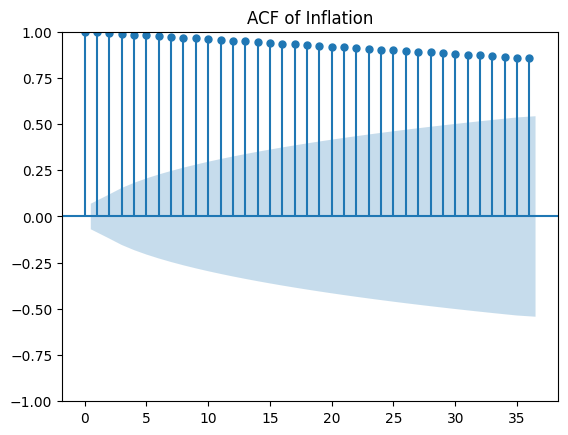

<Figure size 1200x400 with 0 Axes>

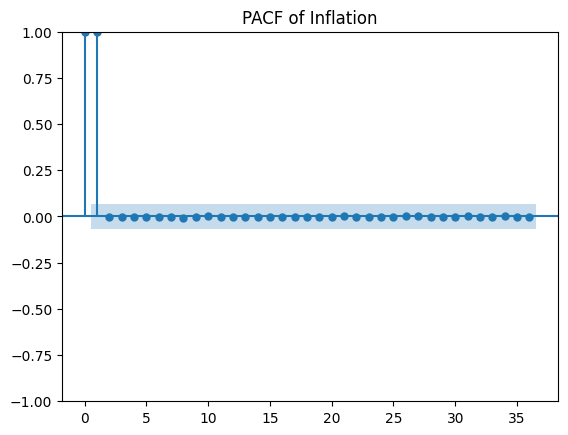

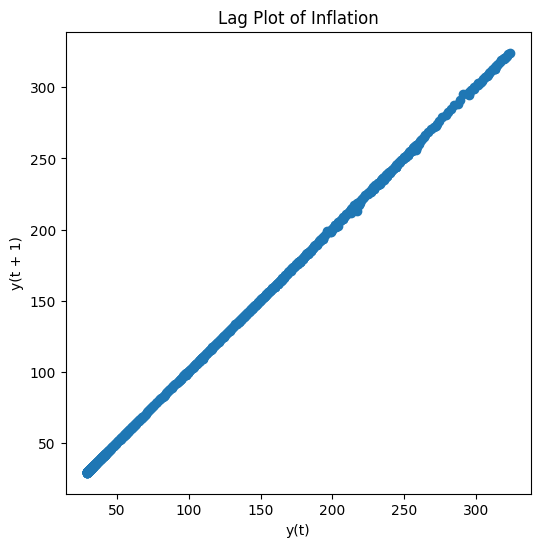

<Figure size 1200x400 with 0 Axes>

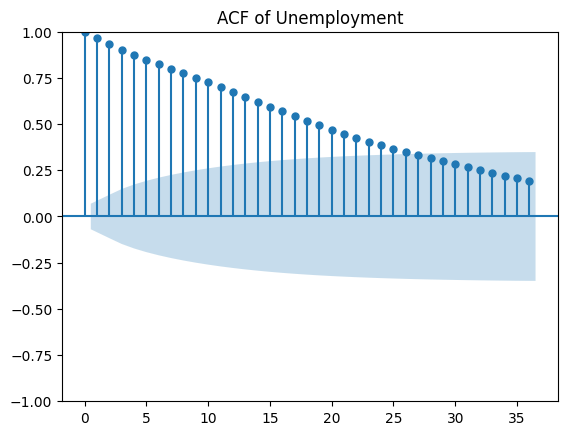

<Figure size 1200x400 with 0 Axes>

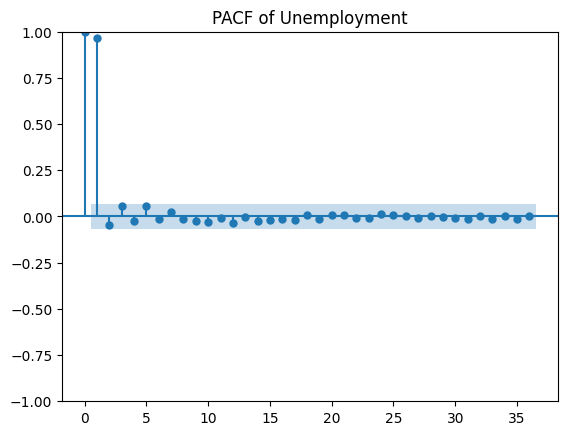

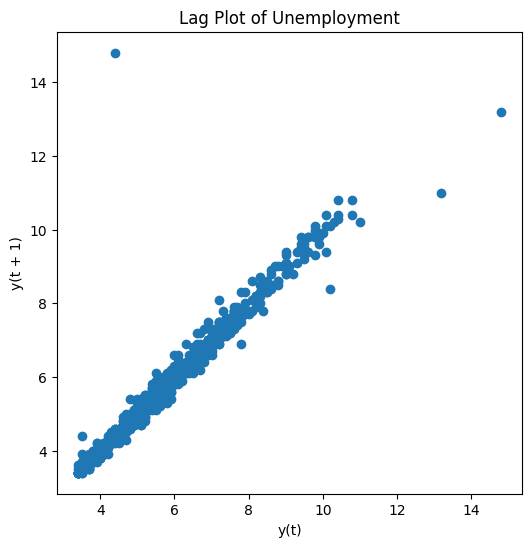

<Figure size 1200x400 with 0 Axes>

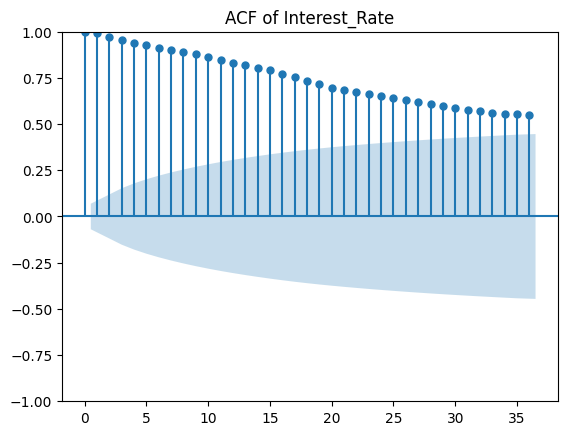

<Figure size 1200x400 with 0 Axes>

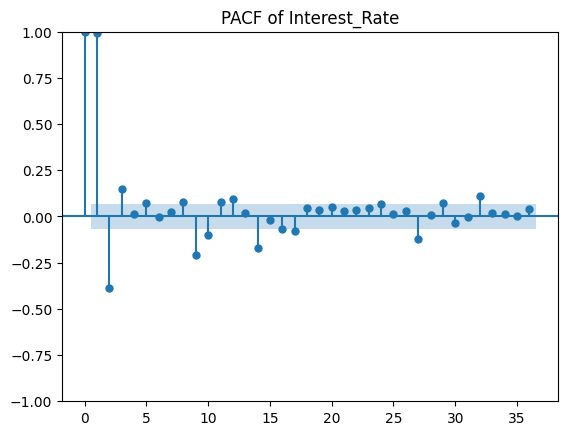

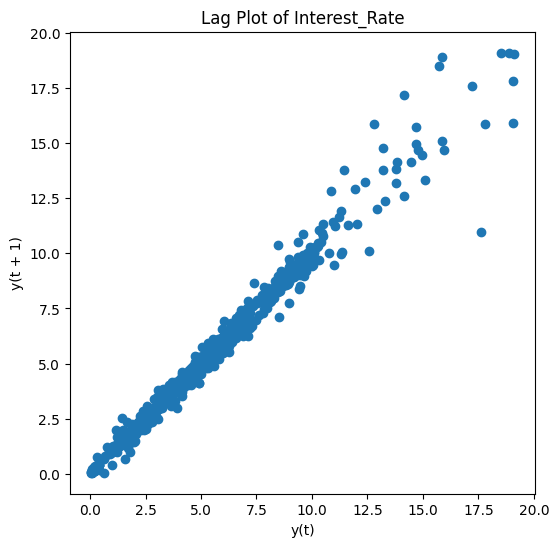

<Figure size 1200x400 with 0 Axes>

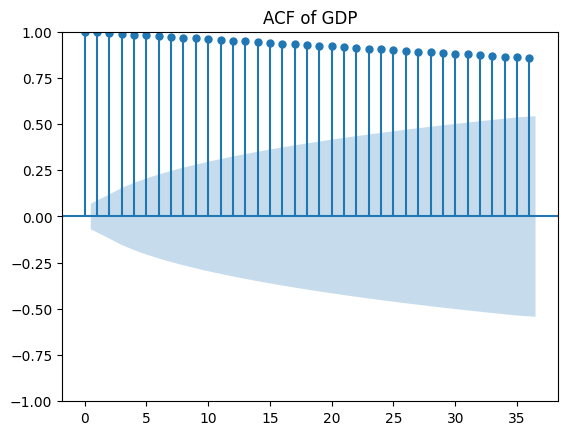

<Figure size 1200x400 with 0 Axes>

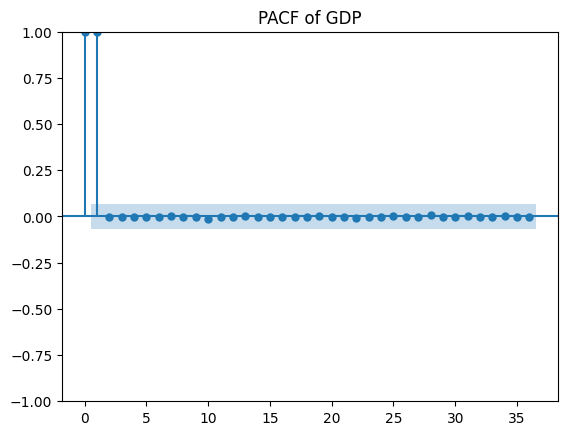

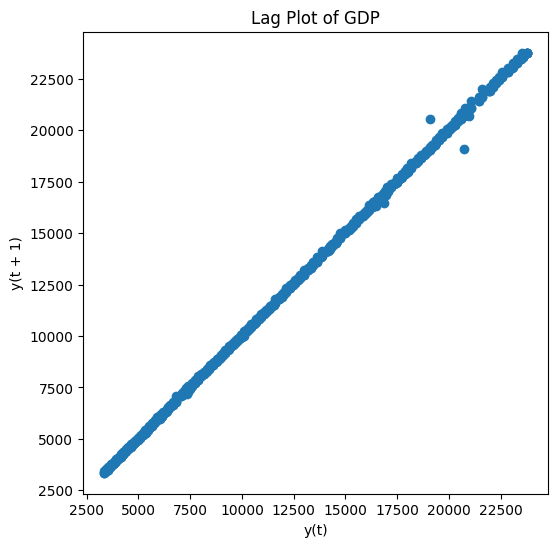

<Figure size 1200x400 with 0 Axes>

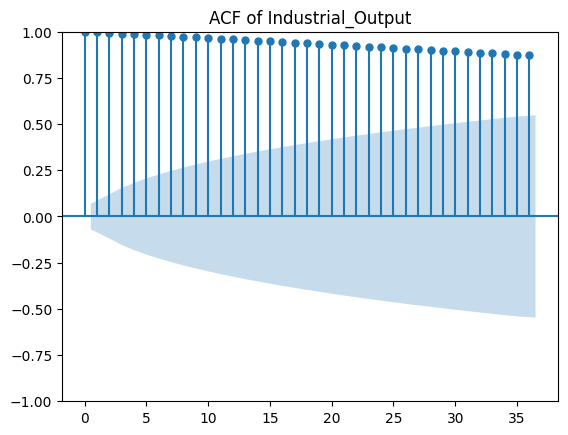

<Figure size 1200x400 with 0 Axes>

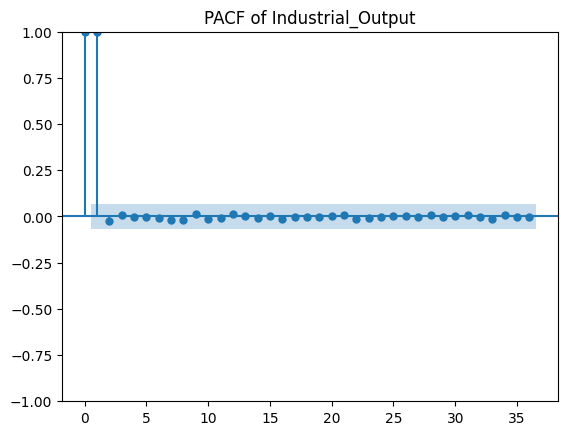

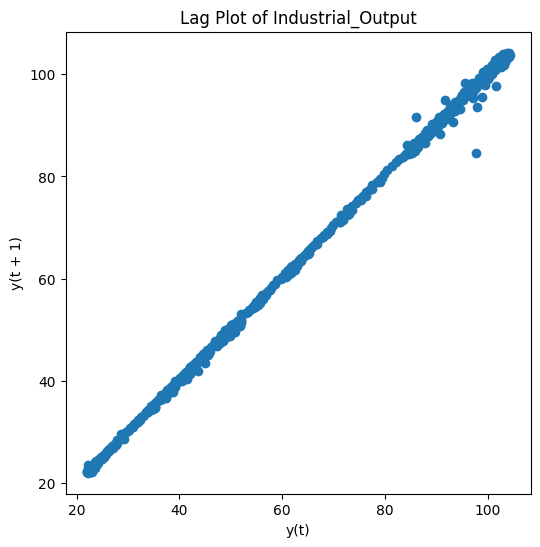

<Figure size 1200x400 with 0 Axes>

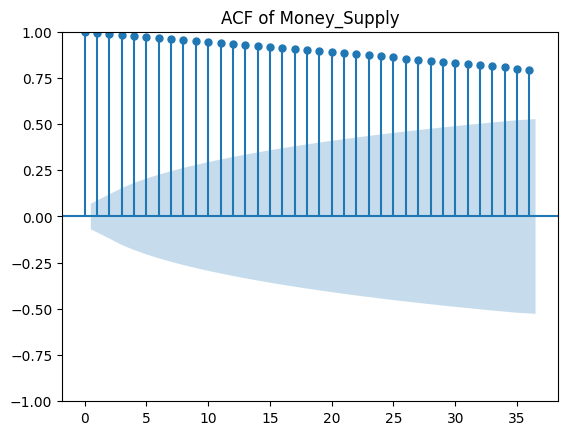

<Figure size 1200x400 with 0 Axes>

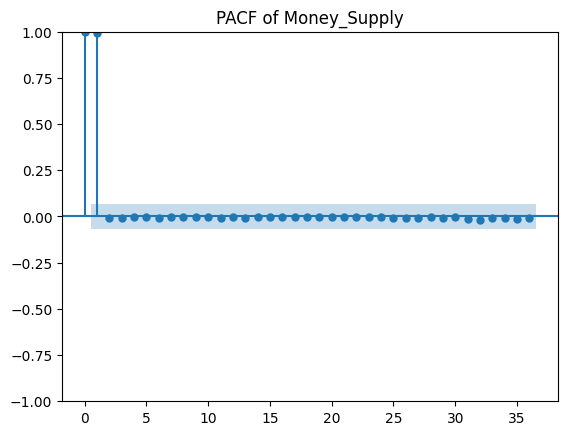

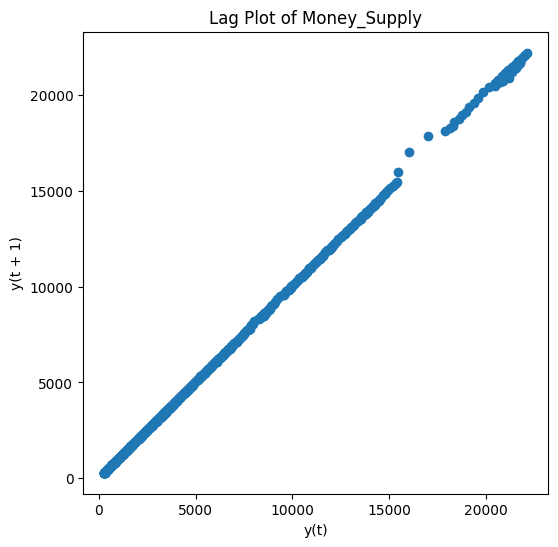

<Figure size 1200x400 with 0 Axes>

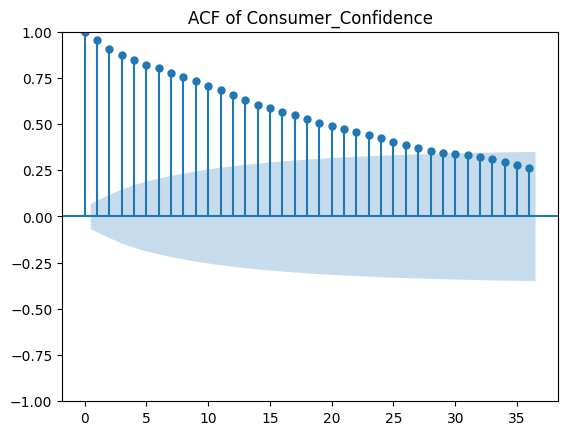

<Figure size 1200x400 with 0 Axes>

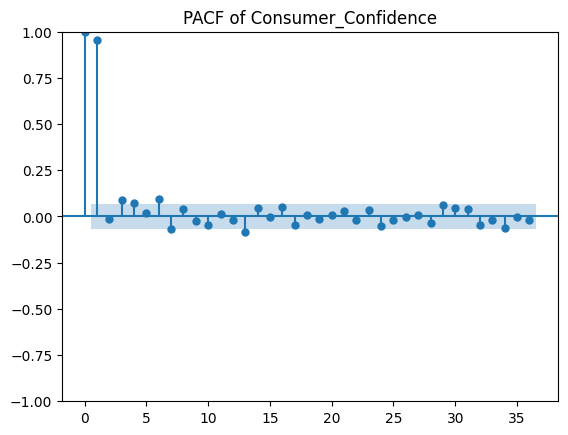

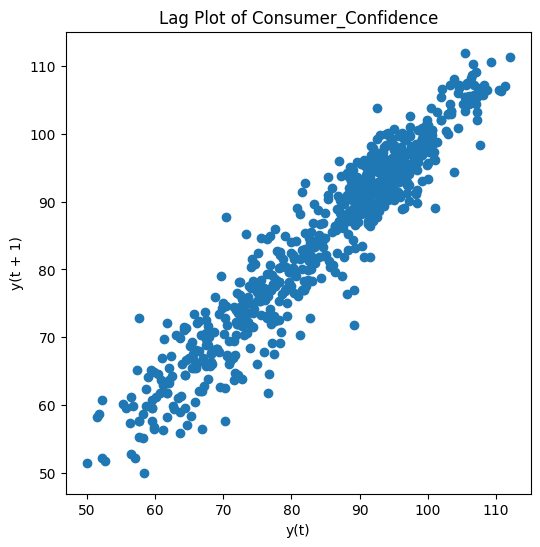

<Figure size 1200x400 with 0 Axes>

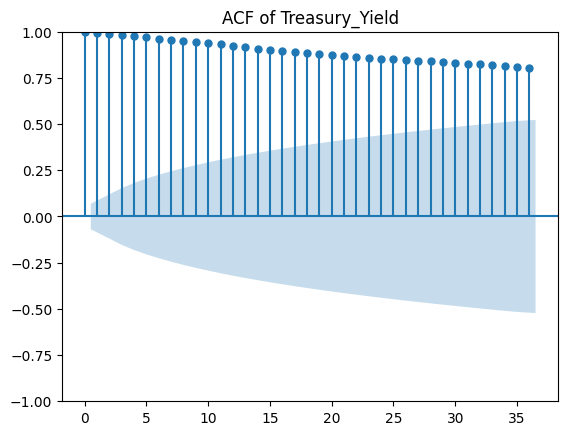

<Figure size 1200x400 with 0 Axes>

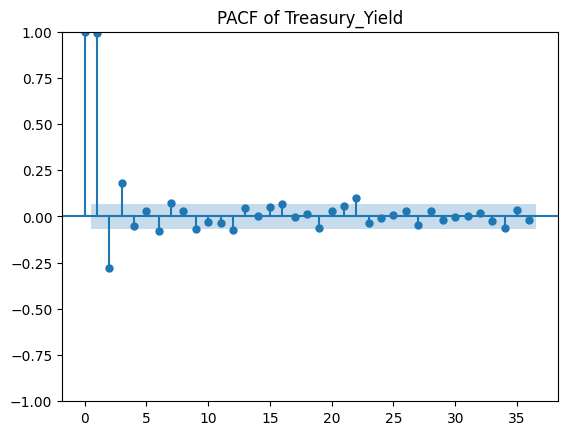

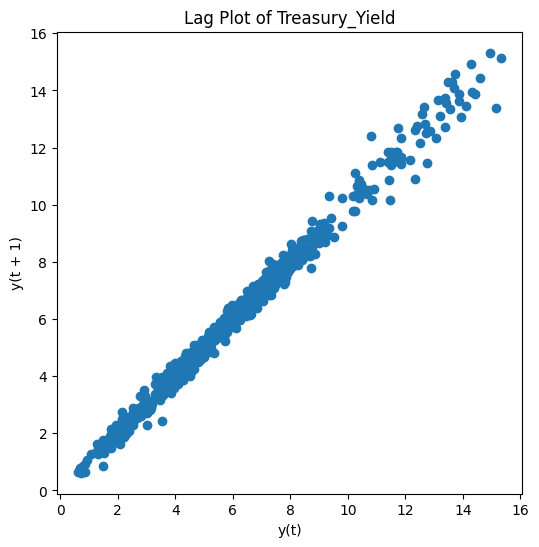

<Figure size 1200x400 with 0 Axes>

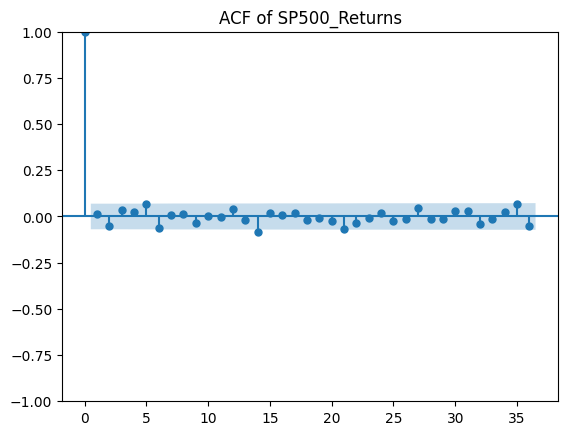

<Figure size 1200x400 with 0 Axes>

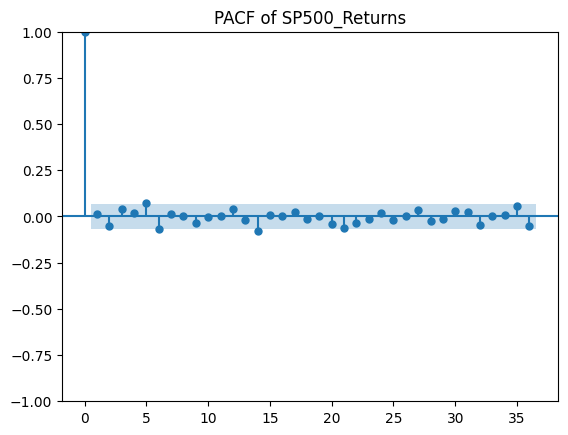

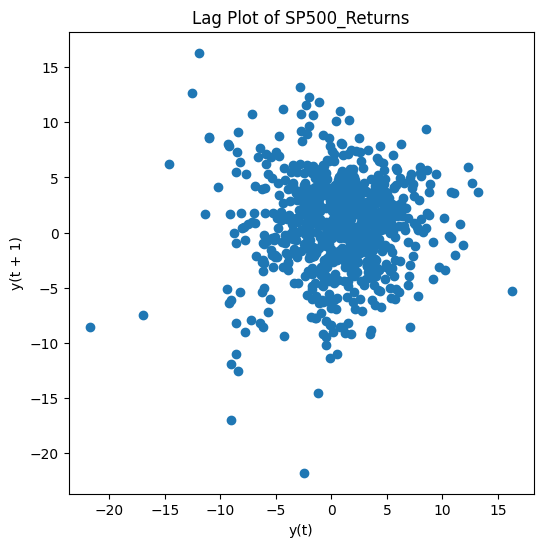

In [ ]:
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for col in variables:
    plt.figure(figsize=(12,4))
    plot_acf(df[col].dropna(), lags=36)
    plt.title(f"ACF of {col}")
    plt.show()

    plt.figure(figsize=(12,4))
    plot_pacf(df[col].dropna(), lags=36)
    plt.title(f"PACF of {col}")
    plt.show()

    plt.figure(figsize=(6,6))
    lag_plot(df[col])
    plt.title(f"Lag Plot of {col}")
    plt.show()


These autocorrelation and lag plots definitively confirm the severe non-stationarity of the macro variables, necessitating transformation for VAR modeling.

SP500_Returns: The lack of significant correlation in the ACF and the scattered Lag Plot definitively prove this series is stationary ($\text{I}(0)$) and is the only variable ready for direct VAR modeling.  

Inflation: Its ACF decays slowly and the Lag Plot shows a near-perfect linear relationship, confirming severe non-stationarity ($\text{I}(1)$) and the need for a logarithmic difference to model it as an inflation rate.  

GDP: The ACF decays extremely slowly and the Lag Plot clusters perfectly along the 45-degree line, which is the hallmark of a strong unit root, necessitating a logarithmic difference for stationarity.  

Money_Supply: Displaying the strongest evidence of a unit root with an extremely slow decaying ACF and a near-perfect linear Lag Plot, this series requires a logarithmic difference to capture its growth rate.  

Industrial_Output: The combination of a slowly decaying ACF and a perfectly linear Lag Plot confirms its dominant trend and severe non-stationarity, requiring a logarithmic difference to represent its growth rate.  

Interest_Rate: Its slowly decaying ACF and highly linear Lag Plot indicate strong persistence and non-stationarity ($\text{I}(1)$), suggesting a first-difference is required to model the change in rate.  

Treasury_Yield: The slow decay of the ACF and the near-perfect linear Lag Plot strongly confirm its non-stationarity ($\text{I}(1)$), mandating a first-difference for the change in yield.  

Unemployment: The slowly decaying ACF and tightly clustered Lag Plot confirm its strong persistence and non-stationarity ($\text{I}(1)$), best addressed by a first-difference to model the change in unemployment.  

Consumer_Confidence: Its persistent ACF and tight linear Lag Plot strongly suggest $\text{I}(1)$ behavior due to high persistence, requiring a first-difference to capture the monthly change in sentiment.

# 4. Volatility / Stationarity Checks

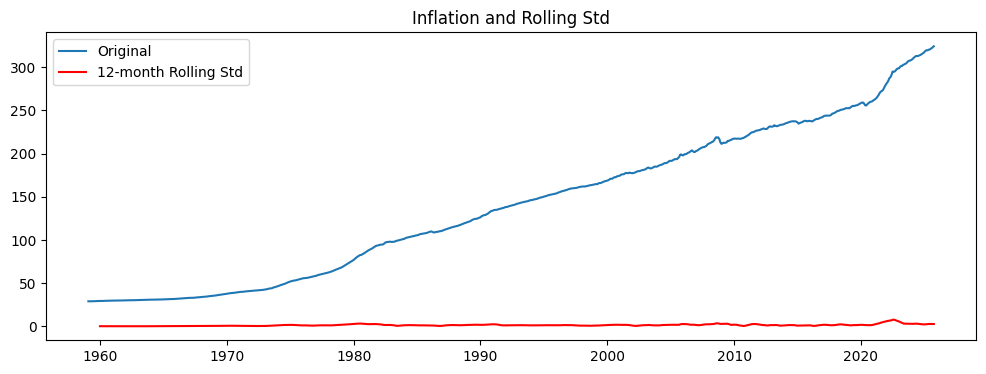

Inflation Dickey-Fuller Test:
  Test Statistic = 2.1120
  p-value = 0.9988
  Series is non-stationary.



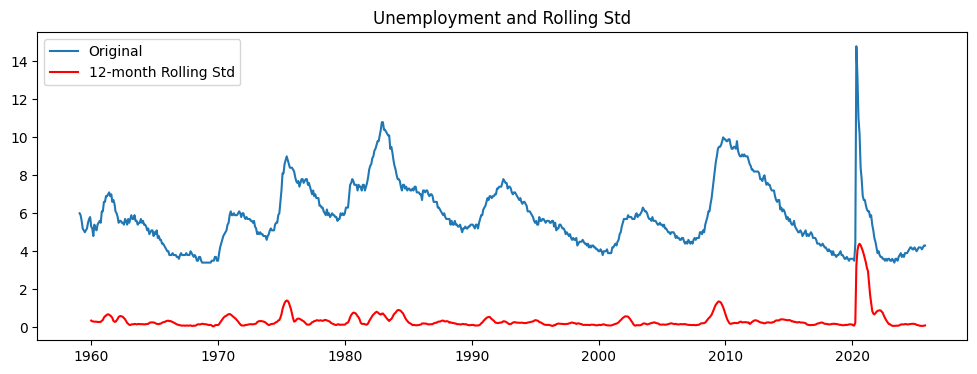

Unemployment Dickey-Fuller Test:
  Test Statistic = -3.4271
  p-value = 0.0101
  Series is stationary.



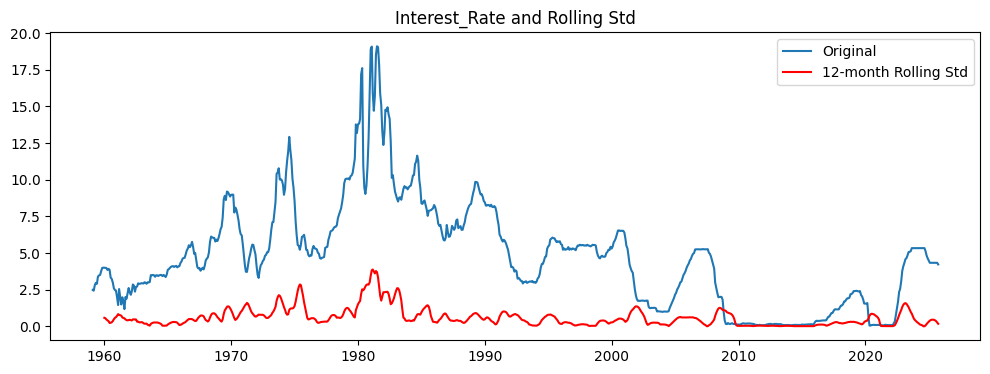

Interest_Rate Dickey-Fuller Test:
  Test Statistic = -2.9316
  p-value = 0.0418
  Series is stationary.



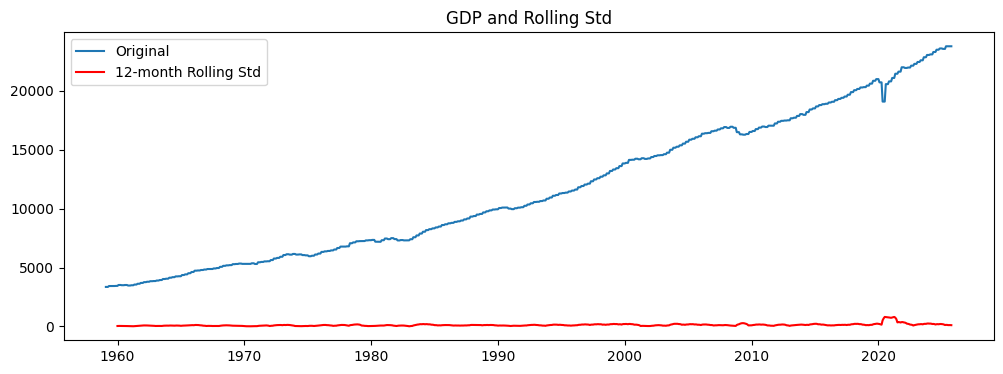

GDP Dickey-Fuller Test:
  Test Statistic = 2.6400
  p-value = 0.9991
  Series is non-stationary.



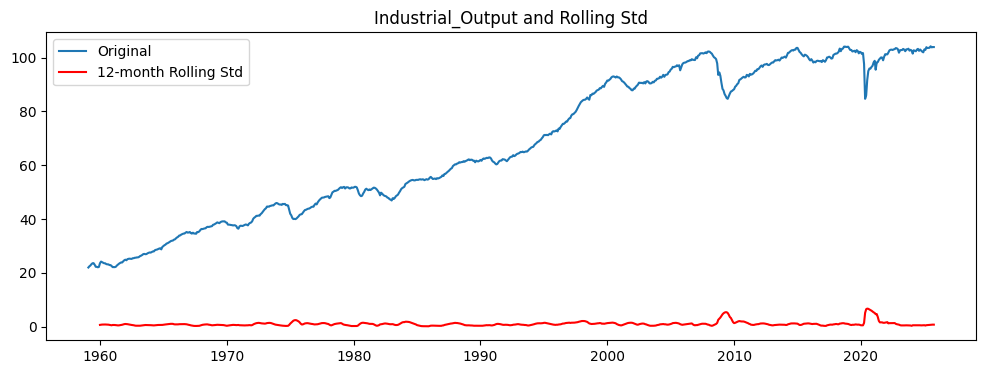

Industrial_Output Dickey-Fuller Test:
  Test Statistic = -1.0437
  p-value = 0.7370
  Series is non-stationary.



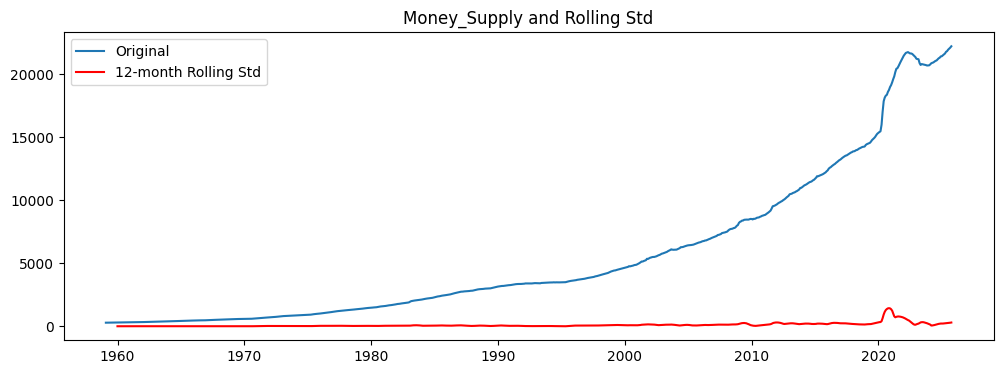

Money_Supply Dickey-Fuller Test:
  Test Statistic = 3.1502
  p-value = 1.0000
  Series is non-stationary.



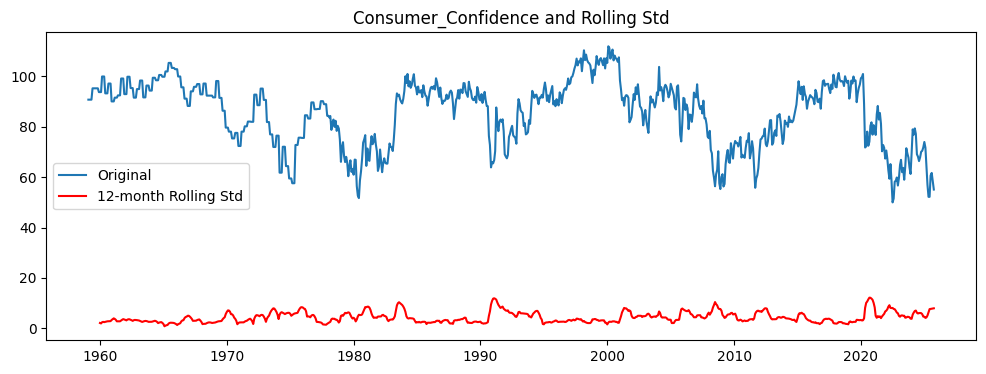

Consumer_Confidence Dickey-Fuller Test:
  Test Statistic = -2.9882
  p-value = 0.0360
  Series is stationary.



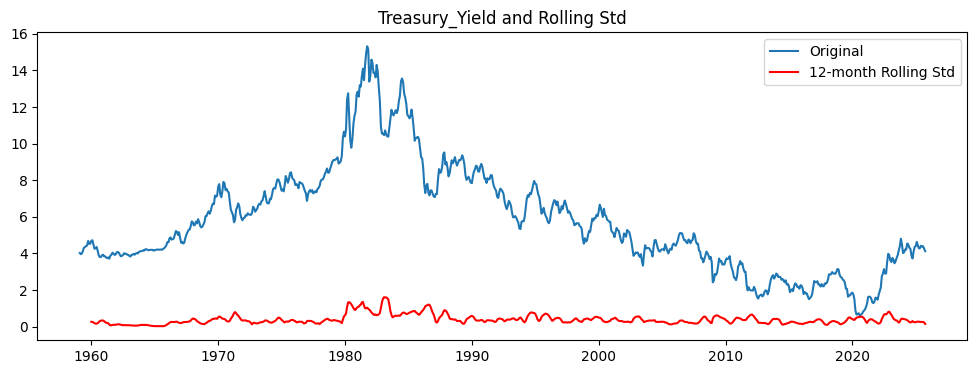

Treasury_Yield Dickey-Fuller Test:
  Test Statistic = -1.2561
  p-value = 0.6490
  Series is non-stationary.



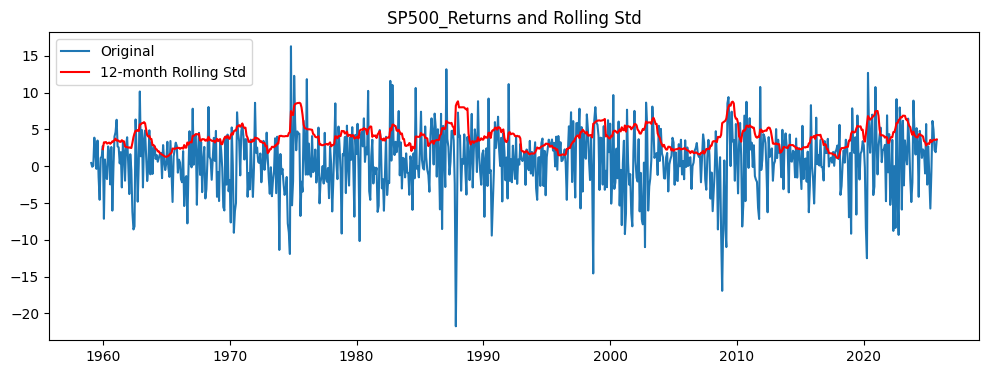

SP500_Returns Dickey-Fuller Test:
  Test Statistic = -11.3029
  p-value = 0.0000
  Series is stationary.



In [ ]:
from statsmodels.tsa.stattools import adfuller

for col in variables:
    # Rolling std
    plt.figure(figsize=(12,4))
    rolling_std = df[col].rolling(window=12).std()
    plt.plot(df.index, df[col], label='Original')
    plt.plot(df.index, rolling_std, label='12-month Rolling Std', color='red')
    plt.title(f"{col} and Rolling Std")
    plt.legend()
    plt.show()

    # Dickey-Fuller Test
    result = adfuller(df[col].dropna())
    print(f"{col} Dickey-Fuller Test:")
    print(f"  Test Statistic = {result[0]:.4f}")
    print(f"  p-value = {result[1]:.4f}")
    if result[1] < 0.05:
        print("  Series is stationary.\n")
    else:
        print("  Series is non-stationary.\n")

This analysis, combining the 12-month Rolling Standard Deviation (Std) plots and the Augmented Dickey-Fuller (ADF) Test results, provides the definitive final insights needed for VAR modeling.  

SP500_Returns: The ADF test decisively confirms stationarity (p-value = 0.0000), while the Rolling Std plot clearly shows volatility clustering (periods of high and low volatility) rather than a trend.  

Unemployment: The ADF test shows stationarity (p-value = 0.0101), but the Rolling Std plot reveals a massive volatility spike during the 2020 pandemic, confirming a structural break in variance.  

Interest_Rate: The ADF test indicates stationarity (p-value = 0.0418), but the Rolling Std plot shows volatility clustered in the 1970s and 1980s, confirming non-constant variance (heteroskedasticity).  

Consumer_Confidence: The ADF test confirms stationarity (p-value = 0.0360), with the Rolling Std plot showing fluctuating volatility across the decades, consistent with its cyclical nature.  

Inflation, GDP, Money_Supply, Industrial_Output, and Treasury_Yield: The ADF tests all definitively confirm non-stationarity (p-values $\geq 0.6490$), making transformations (log-differencing for the indices, first-differencing for the yield) mandatory before VAR estimation.

# 5. Interaction & Insights

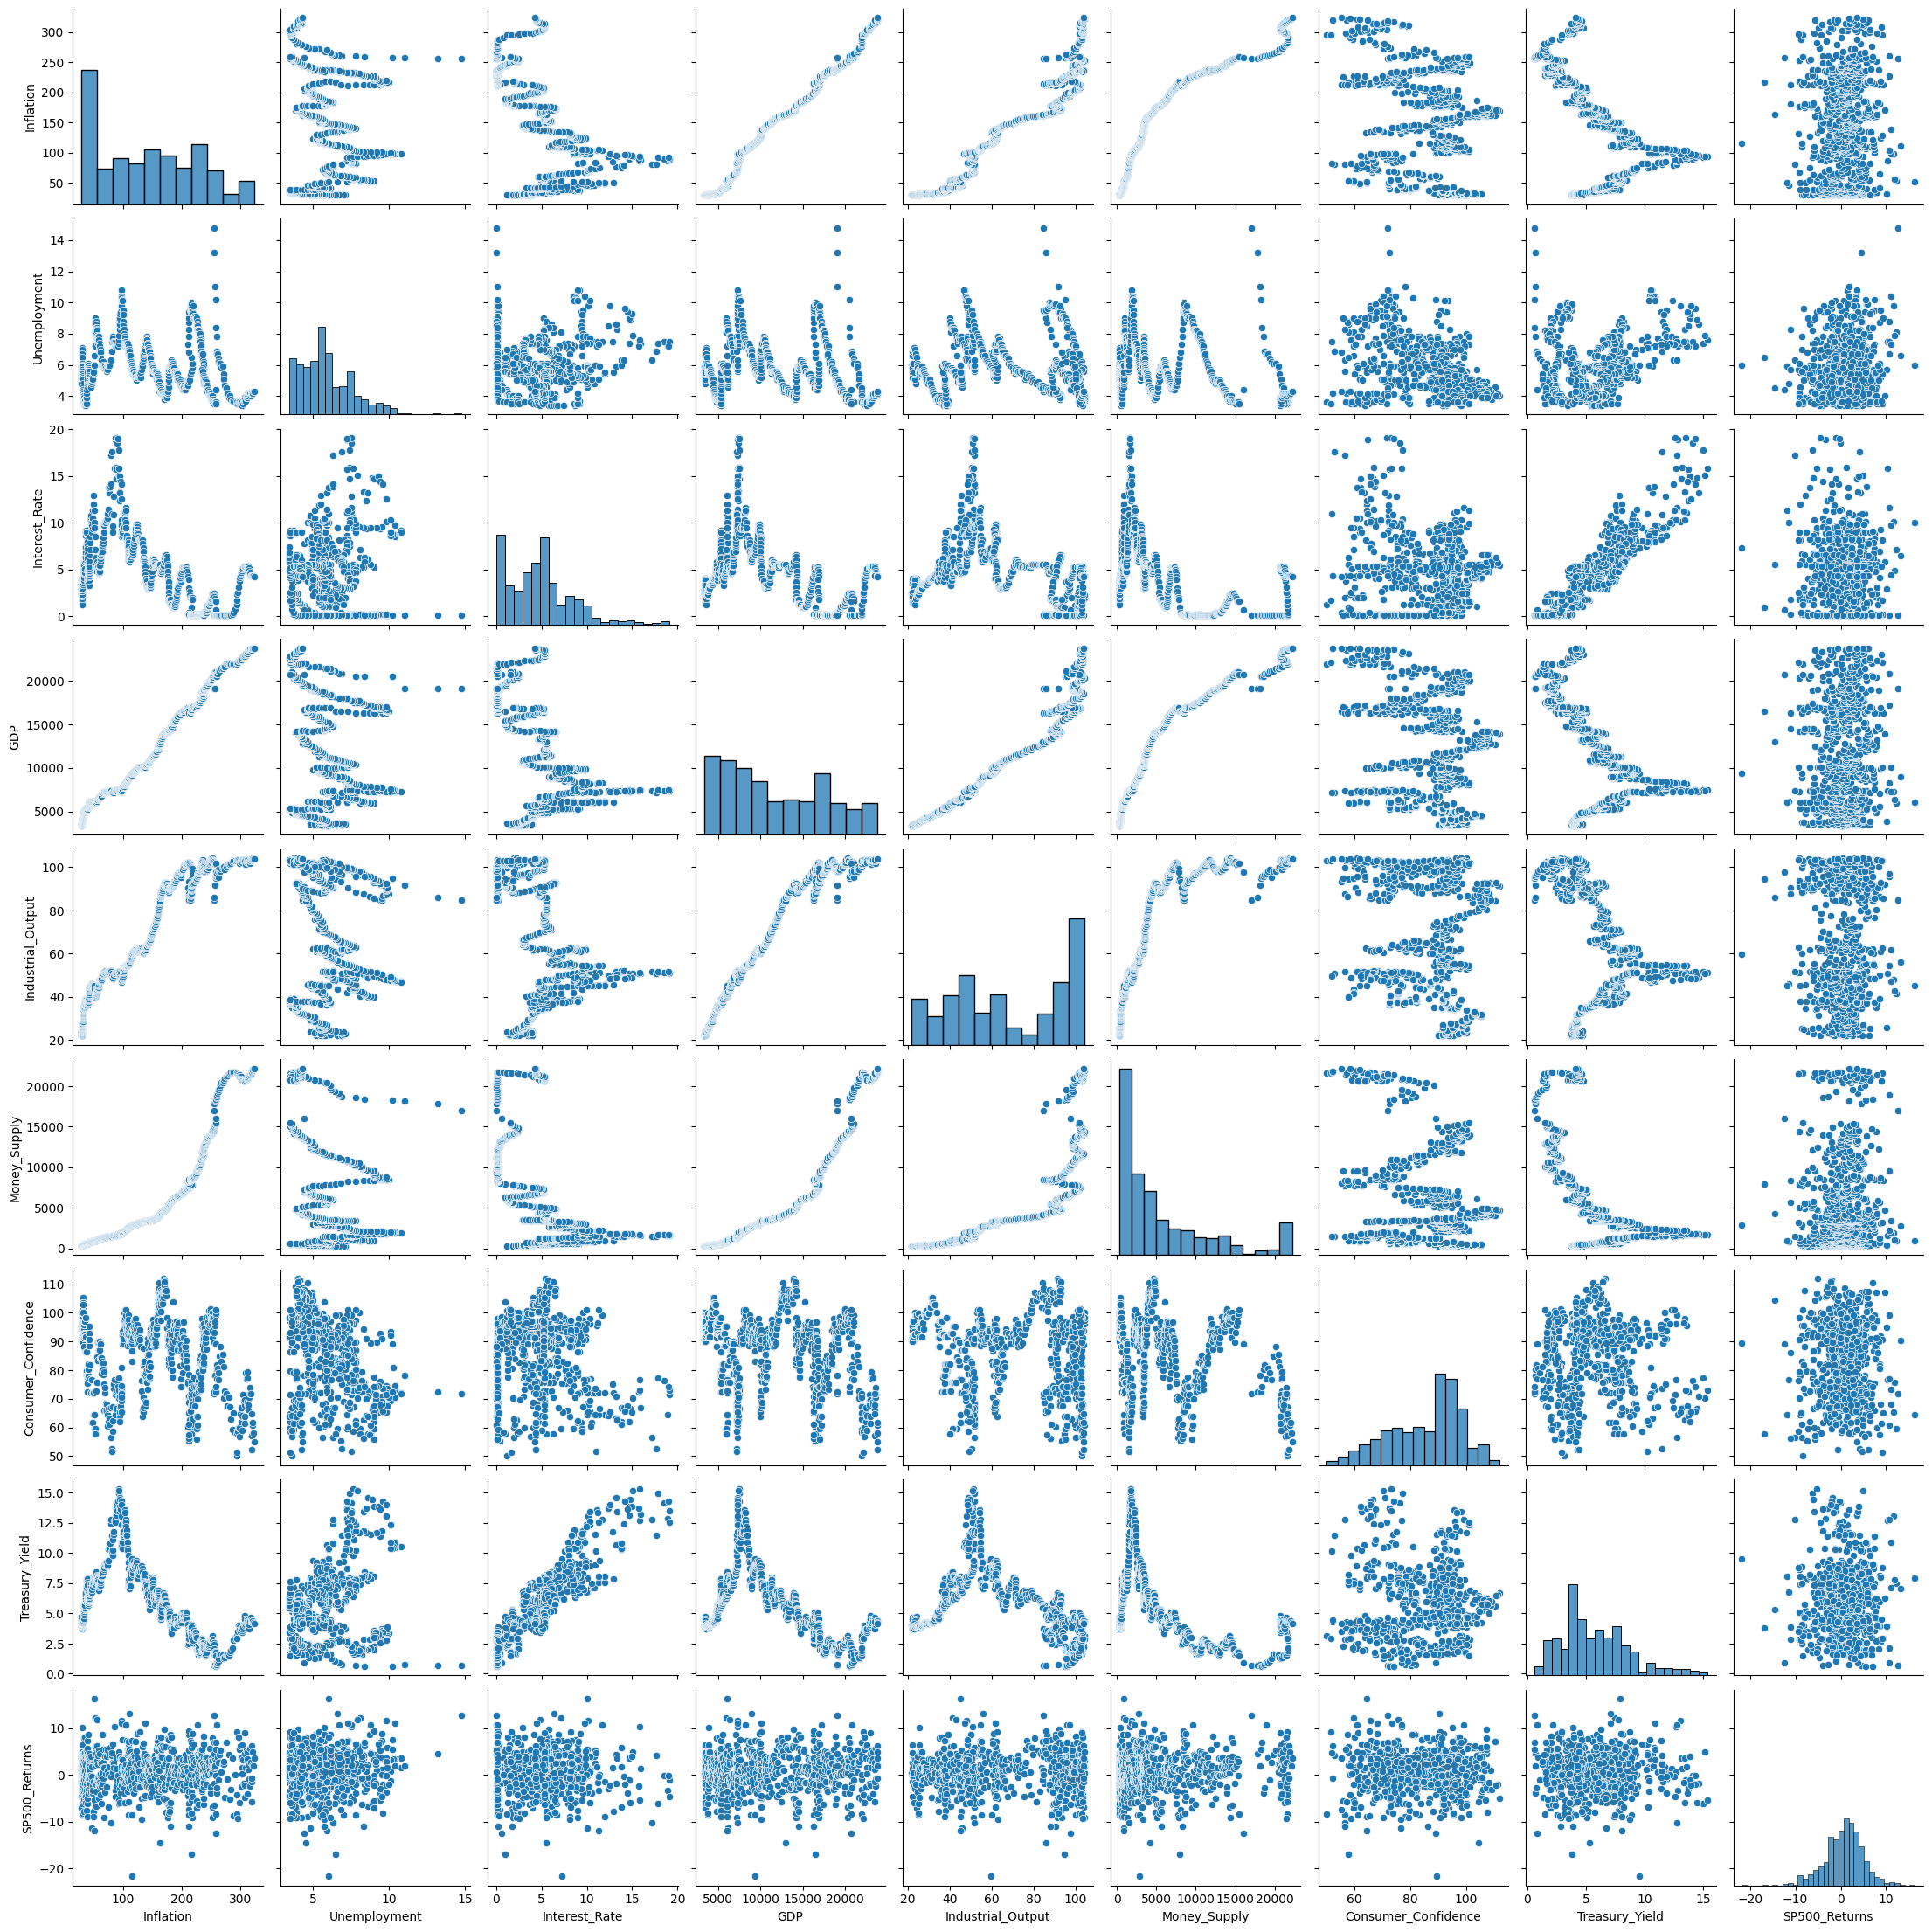

In [ ]:
sns.pairplot(df[variables])
plt.show()

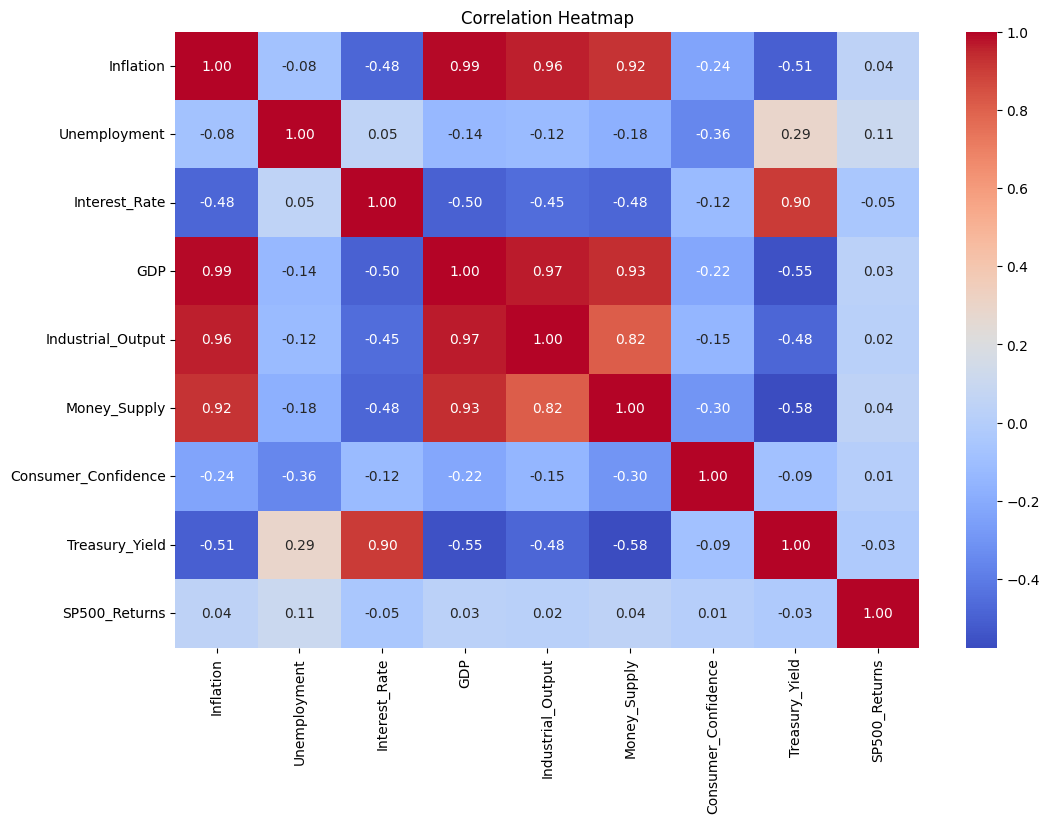

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df[variables].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

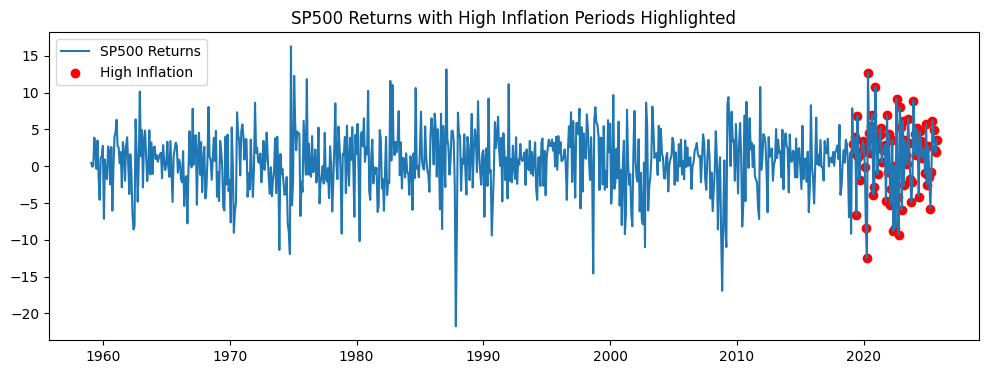

In [ ]:
high_inflation = df['Inflation'] > df['Inflation'].quantile(0.90)
plt.figure(figsize=(12,4))
plt.plot(df.index, df['SP500_Returns'], label='SP500 Returns')
plt.scatter(df.index[high_inflation], df['SP500_Returns'][high_inflation], color='red', label='High Inflation')
plt.title("SP500 Returns with High Inflation Periods Highlighted")
plt.legend()
plt.show()

/tmp/ipython-input-2324227040.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='SP500_Returns', index=df.index.year, columns='Interest_Quantile', aggfunc='mean')


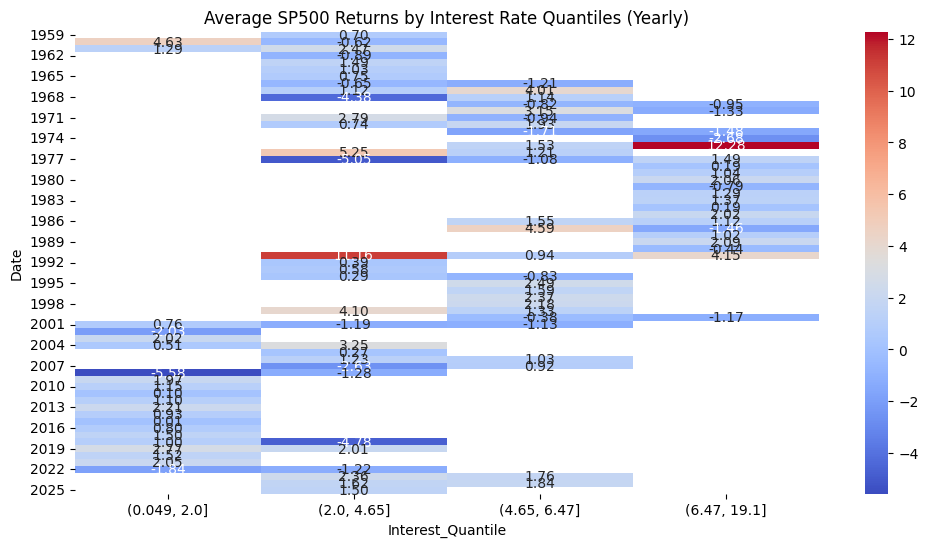

In [ ]:
# Heatmap of returns vs Interest Rate quantiles
df['Interest_Quantile'] = pd.qcut(df['Interest_Rate'], 4)
pivot_table = df.pivot_table(values='SP500_Returns', index=df.index.year, columns='Interest_Quantile', aggfunc='mean')
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Average SP500 Returns by Interest Rate Quantiles (Yearly)")
plt.show()

1. Correlation Heatmap (Linear Relationships):  
S&P 500 Returns vs. Macro Factors: S&P 500 Returns show an extremely weak linear correlation (near zero: $\leq 0.05$) with almost all macroeconomic variables in their level form (e.g., Inflation, GDP, Interest Rate). This confirms that simple correlation on level data is uninformative and justifies the need for the VAR model on differenced data to capture dynamic (lagged) and non-linear relationships.  

    High Inter-Macro Correlation: There is a near-perfect positive correlation (0.93 to 0.99) among the major trended variables (Inflation, GDP, Industrial_Output, Money_Supply). This high multicollinearity further validates the decision to use VAR (which models these interactions) and confirms that these variables capture a common, strong growth/price factor.  

    Interest Rate and Treasury Yield: The Interest Rate is almost perfectly correlated with the Treasury Yield (0.90), suggesting these two variables capture essentially the same monetary and long-term rate signal.  

2. S&P 500 Returns with High Inflation Highlighted  

    Returns Volatility: The plot confirms that $\text{S\&P500 Returns are stationary}$ but exhibit volatility clustering, especially after 2020.  

    High Inflation Effect: In the highlighted period (post-2020), S&P 500 Returns appear to be highly volatile, oscillating wildly, with many negative return months coinciding with the high inflation regime. This visually suggests that high inflation is associated with increased market uncertainty and downside risk, supporting the literature review's focus on uncertainty.